https://archive.ics.uci.edu/dataset/481/emg+data+for+gestures

Description of rawdata *** file. Each file consist of 10 columns:

1. Time - time in ms;
2. Channel - eightEMG channels of MYO Thalmic bracelet;
3. Class –the label of gestures:
 * 0 - unmarked data,
 * 1 - hand at rest,
 * 2 - hand clenched in a fist,
 * 3 - wrist flexion,
 * 4 – wrist extension,
 * 5 – radial deviations,
 * 6 - ulnar deviations,
 * 7 - extended palm (the gesture was not performed by all subjects).

Used links

---



---



https://www.kaggle.com/code/sojanprajapati/emg-signals-for-hand-gesture-classification-r

https://www.kaggle.com/code/chtalhaanwar/gesture-classification-emg

https://www.kaggle.com/code/dhavalmistry99/emg-gesture-classifier-project



## For Data Processing

In [ ]:
import pandas as pd  # for data processing
import numpy as np

# for split the data
from sklearn.model_selection import train_test_split       # for split the data

# For Scaling the input data
from sklearn.preprocessing import StandardScaler


# For Model/ Algorithm selection
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import seaborn as sns

# For visualisation
import matplotlib.pyplot as plt


# For see accuracy for predicted values in classificaiton
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix

In [ ]:
import warnings

# Suppress a specific warning by category
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Description of raw_data  file
Each file consist of 10 columns:
</br>1) Time - time in ms;
</br>2-9) Channel - eight EMG channels of MYO Thalmic bracelet;
</br>10) Class –the label of gestures:
</br>0 - unmarked data,
</br>1 - hand at rest,
</br>2 - hand clenched in a fist,
</br>3 - wrist flexion,
</br>4 – wrist extension,
</br>5 – radial deviations,
</br>6 - ulnar deviations,
</br>7 - extended palm (the gesture was not performed by all subjects).
</br>
</br>Along with this, I have just added "label" column that refers to the subject who performed the experiment. There were 36 subjects, each performed 7 gestures twice.

In [ ]:

#pip install --upgrade scikit-learn

In [ ]:
# dataset link
  # uci -   https://archive.ics.uci.edu/ml/datasets/EMG+data+for+gestures
   # kaggle - https://www.kaggle.com/datasets/sojanprajapati/emg-signal-for-gesture-recognition

## Import and Reading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks (2)/EMG-data.csv")

In [ ]:
data.head()

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1


In [ ]:
data.tail()

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
4237902,50962,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.0,0.00002,0.00002,0,36
4237903,50963,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.0,0.00002,0.00002,0,36
4237904,50964,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.0,0.00002,0.00002,0,36
4237905,50965,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.0,0.00002,0.00002,0,36
4237906,50966,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.0,0.00002,0.00002,0,36


In [ ]:
data['class'].value_counts()

0    2725157
6     253009
5     251733
4     251570
1     250055
3     249494
2     243193
7      13696
Name: class, dtype: int64

In [ ]:
data['label'].value_counts()

13    153240
30    148561
11    147326
2     136426
7     132640
17    132085
34    131202
18    129312
12    128551
20    127853
9     127647
10    123089
32    122930
1     121170
22    119629
21    119247
8     117948
24    116940
25    116747
23    115619
4     114198
33    112105
19    109906
5     107248
27    106799
26    106154
29    105987
3     105785
16    105501
15    105396
36    101754
14    101003
6      99619
35     99501
28     97766
31     91023
Name: label, dtype: int64

In [ ]:
#  to show no of rows and columns
data.shape

(4237907, 11)

**In data we have 10 features and 1 dependant variable with 4237907 data points.**

#### Correlations Between Features

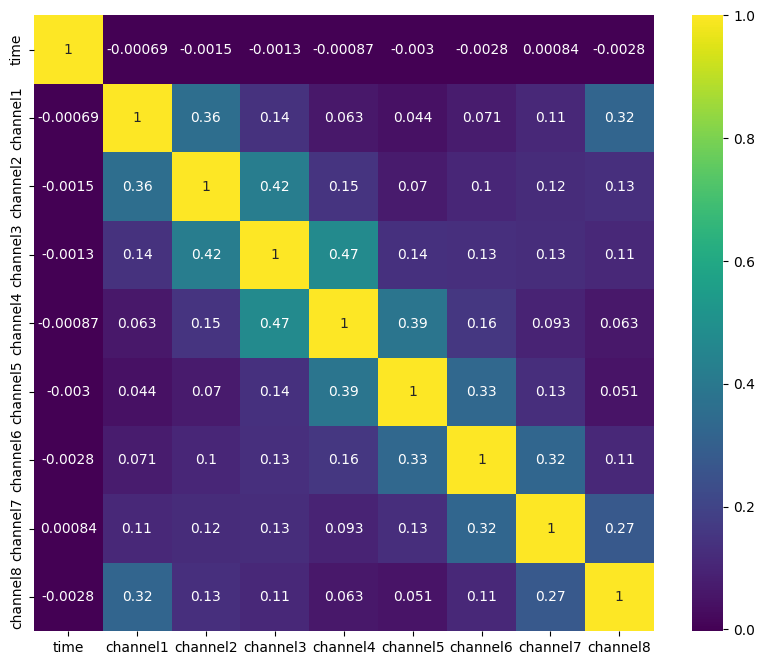

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix between features
corr = X.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix with correlation values
sns.heatmap(corr, annot=True, cmap='viridis')

# Display the heatmap
plt.show()


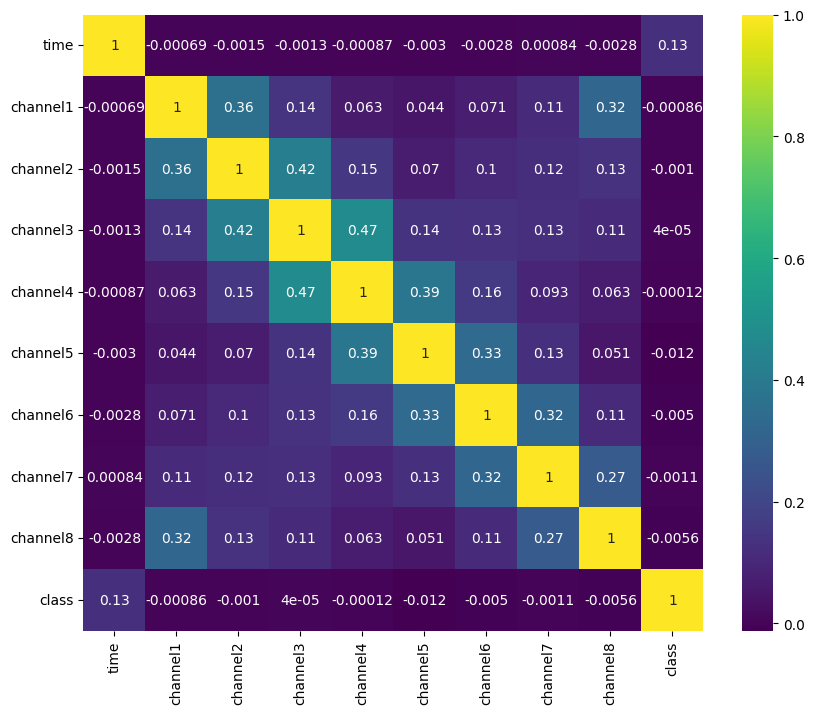

In [ ]:
# Calculate the correlation matrix with features and response variable
corr = df.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix with correlation values
sns.heatmap(corr, annot=True, cmap='viridis')

# Display the heatmap
plt.show()

## Feature Extraction for Signal Processing

In [ ]:
datas = data

In [ ]:
# data = data.drop(['label'],axis = 1)


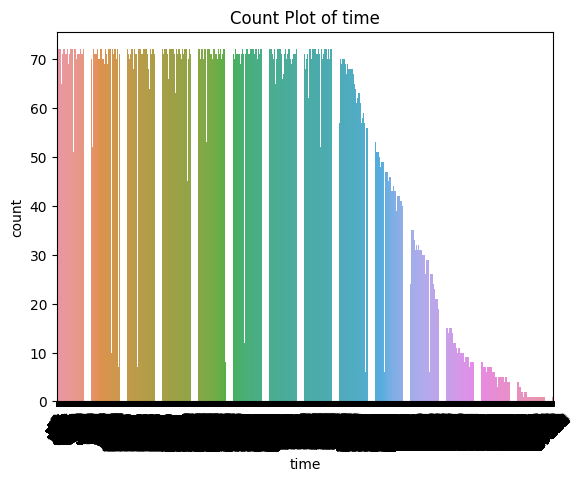

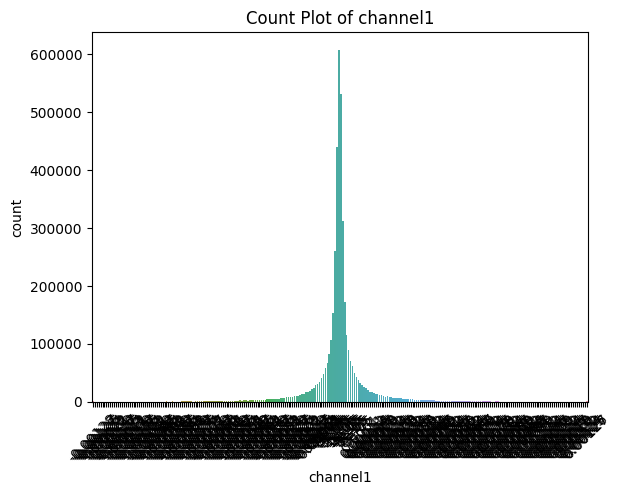

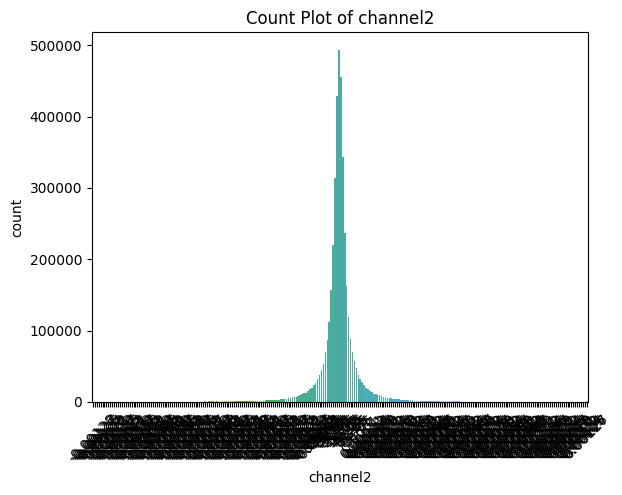

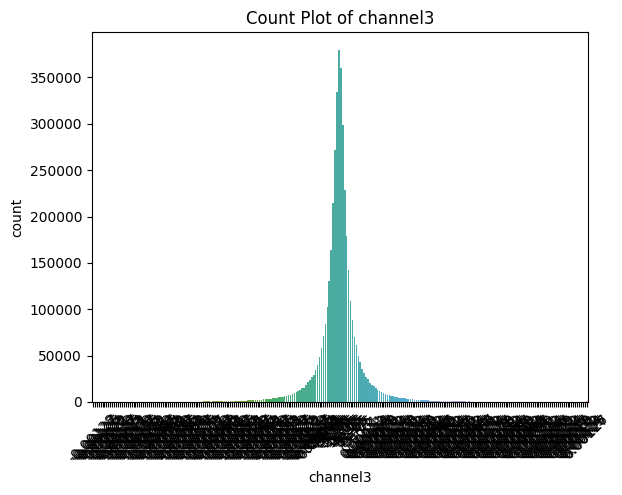

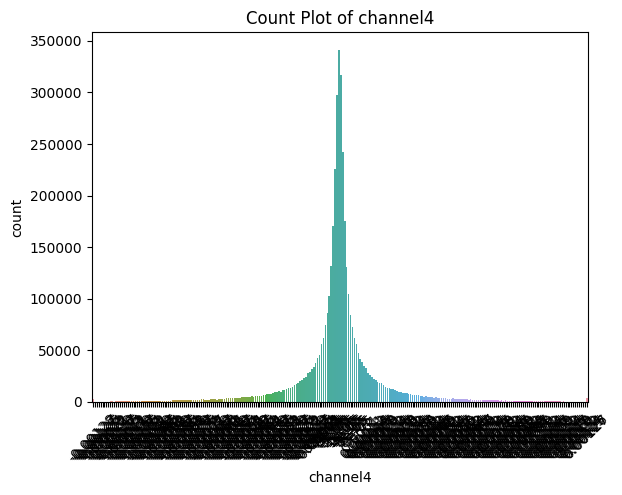

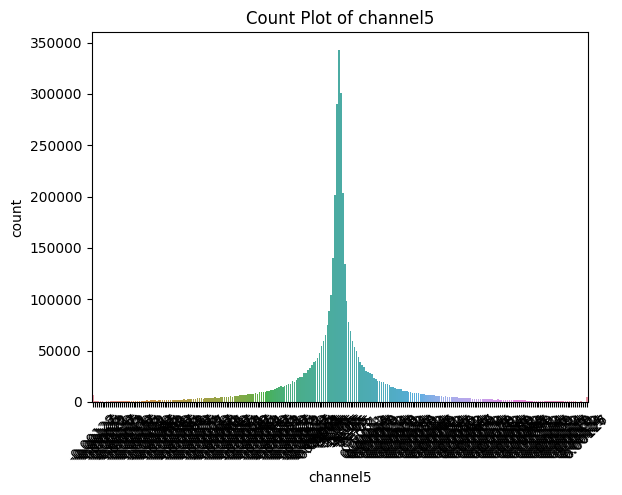

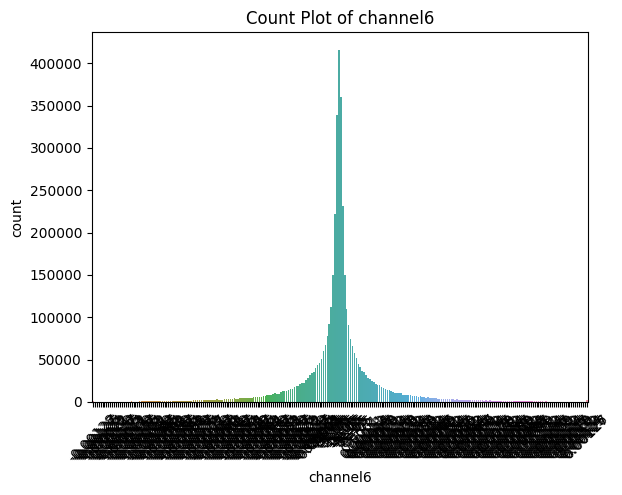

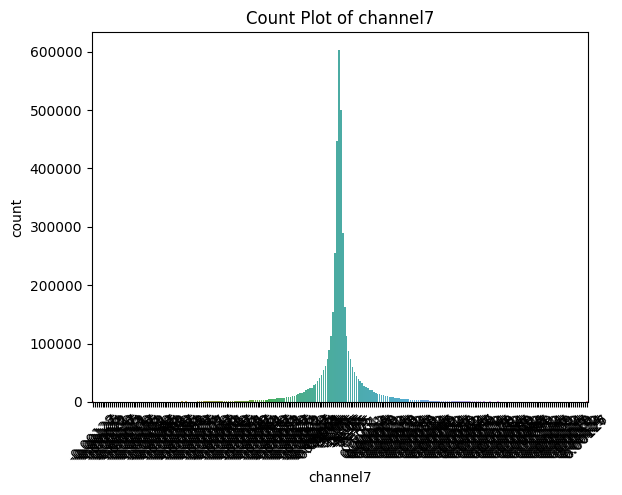

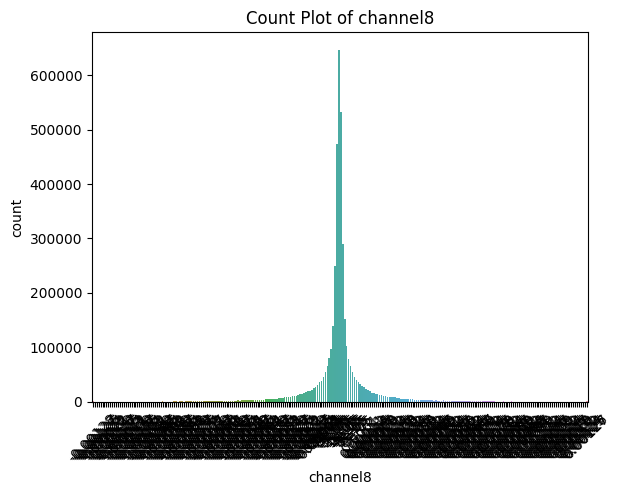

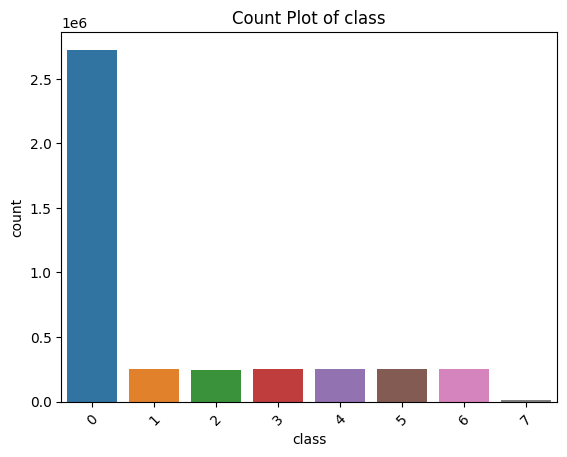

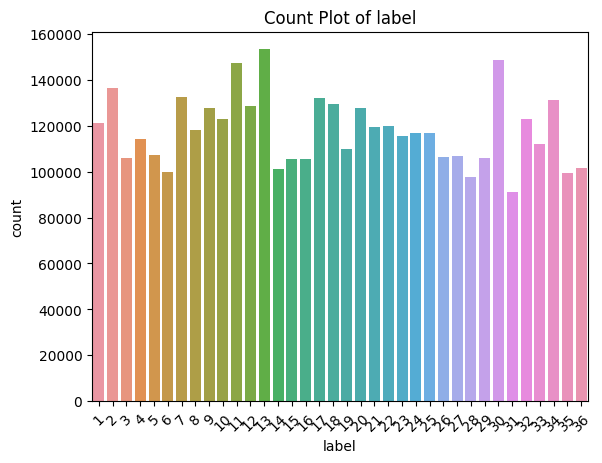

In [ ]:
for col in datas.columns:
    sns.countplot(data=datas, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
datas.head()

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1


In [ ]:
import numpy as np

def rms(data): #root mean square
      return  np.sqrt(np.mean(data**2))

def abs_diffs_signal(data):    # absolute differences between consecutive elements
    return np.sum(np.abs(np.diff(data)))


def zero_crossing(data):
    return np.argmax(np.diff(np.sign(data)))


def mav(signal):     #  mean (average) of the absolute values of all elements
    return np.mean(np.abs(signal))


In [ ]:
subjects_data=data.groupby(['label','class'],axis =1)

NameError: ignored

In [ ]:
datas.isna().sum()

NameError: ignored

In [ ]:
datas['class'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
from time import time
start = time()

 #Specify the columns you want to aggregate
columns_to_aggregate = ['channel1', 'channel2', 'channel3', 'channel4', 'channel5', 'channel6', 'channel7', 'channel8']

# Create a DataFrame to store the aggregated results
aggregated_data = pd.DataFrame()
chunk_size = 500
num_rows = len(datas)


# Apply aggregation functions to selected columns
for col in columns_to_aggregate:
  j = 0
  print(j)

  for cls in datas['class'].unique():
    cls = int(cls)
    df1 = datas[datas['class']==cls]
    for i in range(0, num_rows, chunk_size):
      chunk = df1[col].iloc[i:i+chunk_size]
      aggregated_data.loc[j, 'class'] = cls
      aggregated_data.loc[j, f'{col}_min'] = np.min(chunk)                       #  chunk.apply(np.min)
      aggregated_data.loc[j, f'{col}_max'] = np.max(chunk)                         # chunk.apply(np.max)
      aggregated_data.loc[j, f'{col}_ptp'] = np.ptp(chunk)
      aggregated_data.loc[j, f'{col}_std'] = np.std(chunk)
      aggregated_data.loc[j, f'{col}_rms'] = rms(chunk)
      aggregated_data.loc[j, f'{col}_mav'] = mav(chunk)                        #   chunk.apply(np.ptp)
      # Calculate zero crossing and abs_diffs_signal if chunk has enough data
      if len(chunk) > 1:
        aggregated_data.at[j, f'{col}_zero_crossing'] = zero_crossing(chunk)
        aggregated_data.at[j, f'{col}_abs_diffs_signal'] = abs_diffs_signal(chunk)

        j = j+1
      else:
        aggregated_data.at[j, f'{col}_zero_crossing'] = np.nan
        aggregated_data.at[j, f'{col}_abs_diffs_signal'] = np.nan

        j = j+1


# Print the aggregated datas

end = time()
print('feature calculation time of one subject one class')
print((end - start) / (36 * 7))
aggregated_data

0
0
0
0
0
0
0
0
feature calculation time of one subject one class
4.655574459878225


,class,channel1_min,channel1_max,channel1_ptp,channel1_std,channel1_rms,channel1_mav,channel1_zero_crossing,channel1_abs_diffs_signal,channel2_min,...,channel7_zero_crossing,channel7_abs_diffs_signal,channel8_min,channel8_max,channel8_ptp,channel8_std,channel8_rms,channel8_mav,channel8_zero_crossing,channel8_abs_diffs_signal
0,0.0,-0.00003,0.00001,0.00004,0.000012,0.000014,0.000011,105.0,0.00080,-0.00008,...,38.0,0.00057,-0.00004,0.00002,0.00006,0.000011,0.000014,0.000011,1.0,0.00061
1,0.0,-0.00006,0.00003,0.00009,0.000016,0.000019,0.000015,102.0,0.00092,-0.00006,...,124.0,0.00069,-0.00004,0.00001,0.00005,0.000012,0.000014,0.000011,58.0,0.00069
2,0.0,-0.00005,0.00001,0.00006,0.000011,0.000012,0.000009,71.0,0.00076,-0.00006,...,63.0,0.00053,-0.00003,0.00002,0.00005,0.000010,0.000014,0.000011,21.0,0.00067
3,0.0,-0.00004,0.00001,0.00005,0.000011,0.000014,0.000011,28.0,0.00065,-0.00006,...,172.0,0.00071,-0.00004,0.00001,0.00005,0.000010,0.000014,0.000010,316.0,0.00062
4,0.0,-0.00004,0.00001,0.00005,0.000011,0.000013,0.000009,42.0,0.00074,-0.00010,...,194.0,0.00071,-0.00003,0.00001,0.00004,0.000010,0.000015,0.000012,64.0,0.00055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67803,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67804,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67805,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67806,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
save_path =   '/content/drive/MyDrive/Colab Notebooks (2)/adata.xlsx'
 #'/content/drive/My Drive/path_to_drive_folder/dataset.xlsx'

aggregated_data.to_excel(save_path, index=False)

In [ ]:
agg_data = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks (2)/adata.xlsx')

In [ ]:
agg_data.head()

,class,channel1_min,channel1_max,channel1_ptp,channel1_std,channel1_rms,channel1_mav,channel1_zero_crossing,channel1_abs_diffs_signal,channel2_min,...,channel7_zero_crossing,channel7_abs_diffs_signal,channel8_min,channel8_max,channel8_ptp,channel8_std,channel8_rms,channel8_mav,channel8_zero_crossing,channel8_abs_diffs_signal
0,0,-0.00003,0.00001,0.00004,0.000012,0.000014,0.000011,105.0,0.00080,-0.00008,...,38.0,0.00057,-0.00004,0.00002,0.00006,0.000011,0.000014,0.000011,1.0,0.00061
1,0,-0.00006,0.00003,0.00009,0.000016,0.000019,0.000015,102.0,0.00092,-0.00006,...,124.0,0.00069,-0.00004,0.00001,0.00005,0.000012,0.000014,0.000011,58.0,0.00069
2,0,-0.00005,0.00001,0.00006,0.000011,0.000012,0.000009,71.0,0.00076,-0.00006,...,63.0,0.00053,-0.00003,0.00002,0.00005,0.000010,0.000014,0.000011,21.0,0.00067
3,0,-0.00004,0.00001,0.00005,0.000011,0.000014,0.000011,28.0,0.00065,-0.00006,...,172.0,0.00071,-0.00004,0.00001,0.00005,0.000010,0.000014,0.000010,316.0,0.00062
4,0,-0.00004,0.00001,0.00005,0.000011,0.000013,0.000009,42.0,0.00074,-0.00010,...,194.0,0.00071,-0.00003,0.00001,0.00004,0.000010,0.000015,0.000012,64.0,0.00055


In [ ]:
print(agg_data.isna().sum())
print(agg_data.shape)
print(agg_data['class'].value_counts())


class                            0
channel1_min                 59327
channel1_max                 59327
channel1_ptp                 59327
channel1_std                 59327
                             ...  
channel8_std                 59327
channel8_rms                 59327
channel8_mav                 59327
channel8_zero_crossing       59327
channel8_abs_diffs_signal    59327
Length: 65, dtype: int64
(67808, 65)
0    8476
1    8476
2    8476
3    8476
4    8476
5    8476
6    8476
7    8476
Name: class, dtype: int64


# Data Preprocessing

## Data Cleaning

In [ ]:
agg_data.dropna()['class'].value_counts()

0    5451
6     507
4     504
5     504
1     501
3     499
2     487
7      28
Name: class, dtype: int64

In [ ]:
agg_data.dropna(inplace = True)

In [ ]:
agg_data

,class,channel1_min,channel1_max,channel1_ptp,channel1_std,channel1_rms,channel1_mav,channel1_zero_crossing,channel1_abs_diffs_signal,channel2_min,...,channel7_zero_crossing,channel7_abs_diffs_signal,channel8_min,channel8_max,channel8_ptp,channel8_std,channel8_rms,channel8_mav,channel8_zero_crossing,channel8_abs_diffs_signal
0,0,-0.00003,0.00001,0.00004,0.000012,0.000014,0.000011,105.0,0.00080,-0.00008,...,38.0,0.00057,-0.00004,0.00002,0.00006,0.000011,0.000014,0.000011,1.0,0.00061
1,0,-0.00006,0.00003,0.00009,0.000016,0.000019,0.000015,102.0,0.00092,-0.00006,...,124.0,0.00069,-0.00004,0.00001,0.00005,0.000012,0.000014,0.000011,58.0,0.00069
2,0,-0.00005,0.00001,0.00006,0.000011,0.000012,0.000009,71.0,0.00076,-0.00006,...,63.0,0.00053,-0.00003,0.00002,0.00005,0.000010,0.000014,0.000011,21.0,0.00067
3,0,-0.00004,0.00001,0.00005,0.000011,0.000014,0.000011,28.0,0.00065,-0.00006,...,172.0,0.00071,-0.00004,0.00001,0.00005,0.000010,0.000014,0.000010,316.0,0.00062
4,0,-0.00004,0.00001,0.00005,0.000011,0.000013,0.000009,42.0,0.00074,-0.00010,...,194.0,0.00071,-0.00003,0.00001,0.00004,0.000010,0.000015,0.000012,64.0,0.00055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59355,7,-0.00009,0.00007,0.00016,0.000036,0.000036,0.000029,36.0,0.00235,-0.00008,...,13.0,0.00407,-0.00073,0.00059,0.00132,0.000238,0.000238,0.000164,72.0,0.01162
59356,7,-0.00016,0.00016,0.00032,0.000057,0.000057,0.000040,59.0,0.00270,-0.00009,...,20.0,0.00304,-0.00039,0.00040,0.00079,0.000181,0.000184,0.000139,20.0,0.00915
59357,7,-0.00008,0.00012,0.00020,0.000039,0.000041,0.000032,48.0,0.00192,-0.00010,...,48.0,0.00343,-0.00051,0.00053,0.00104,0.000200,0.000200,0.000155,48.0,0.01171
59358,7,-0.00009,0.00008,0.00017,0.000036,0.000037,0.000027,36.0,0.00202,-0.00009,...,72.0,0.00336,-0.00057,0.00047,0.00104,0.000186,0.000186,0.000132,15.0,0.01007


Remove 7 from class because it don't have much information to provide also need to reduce 0 from class that can lead to overfit 0 class but less fit to other data

In [ ]:
# drop 7 from class
agg_data = agg_data[agg_data['class'] != 7]

In [ ]:
# finding dub=plicate data
print(f'number of duplicate data is :{agg_data.duplicated().sum()}')

number of duplicate data is :0


In [ ]:
# Calculate the correlation
correlation_table = agg_data.corr()

# Set display options for the display function
with pd.option_context('display.max_columns', None, 'display.max_rows', None, 'display.float_format', '{:.4f}'.format):
    display(correlation_table['class'])

class                        1.0000
channel1_min                -0.1732
channel1_max                 0.1637
channel1_ptp                 0.1725
channel1_std                 0.1806
channel1_rms                 0.1790
channel1_mav                 0.1899
channel1_zero_crossing      -0.1660
channel1_abs_diffs_signal    0.1879
channel2_min                -0.1235
channel2_max                 0.1208
channel2_ptp                 0.1255
channel2_std                 0.1453
channel2_rms                 0.1431
channel2_mav                 0.1568
channel2_zero_crossing      -0.1111
channel2_abs_diffs_signal    0.1502
channel3_min                -0.1037
channel3_max                 0.1320
channel3_ptp                 0.1218
channel3_std                 0.1400
channel3_rms                 0.1386
channel3_mav                 0.1532
channel3_zero_crossing      -0.0542
channel3_abs_diffs_signal    0.1432
channel4_min                -0.1952
channel4_max                 0.2109
channel4_ptp                

In [ ]:
len(agg_data.columns)

65

In [ ]:
agg_data['class'].value_counts()

0    5451
6     507
4     504
5     504
1     501
3     499
2     487
Name: class, dtype: int64

## Deal with Imbalance dataset

In [ ]:
X = agg_data.drop('class',axis=1)
y = agg_data['class']

In [ ]:
print(f'shape of X is: {X.shape}')
print(f'shape of Y is: {y.shape}')

shape of X is: (8453, 64)
shape of Y is: (8453,)


In [ ]:
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE

# For class 0, set the desired number of samples to be the same as class 6 (507)
sampling_strategy = {0: 507}

# Initialize the ClusterCentroids undersampler with the specified sampling strategy
undersampler = ClusterCentroids(sampling_strategy=sampling_strategy, random_state=42)

# Perform undersampling
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

# Apply SMOTE oversampling to the undersampled class 1 samples
oversampler = SMOTE(random_state=42)
X_combined, y_combined = oversampler.fit_resample(X_undersampled, y_undersampled)

# Calculate the correlation matrix with features and response variable
# Combine X and y into a single DataFrame
data_bal = pd.concat([X_combined, y_combined], axis=1)
data_bal


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,channel1_min,channel1_max,channel1_ptp,channel1_std,channel1_rms,channel1_mav,channel1_zero_crossing,channel1_abs_diffs_signal,channel2_min,channel2_max,...,channel7_abs_diffs_signal,channel8_min,channel8_max,channel8_ptp,channel8_std,channel8_rms,channel8_mav,channel8_zero_crossing,channel8_abs_diffs_signal,class
0,-0.000261,0.000259,0.000520,0.000100,0.000101,0.000078,19.878049,0.006476,-0.000179,0.000133,...,0.005964,-0.000272,0.000259,0.000531,0.000098,0.000100,0.000077,35.195122,0.006363,0
1,-0.000112,0.000114,0.000226,0.000036,0.000038,0.000022,57.400000,0.001838,-0.000090,0.000054,...,0.003592,-0.000186,0.000154,0.000340,0.000059,0.000062,0.000038,250.200000,0.002850,0
2,-0.000042,0.000020,0.000062,0.000013,0.000016,0.000012,285.000000,0.000788,-0.000062,0.000042,...,0.000734,-0.000038,0.000016,0.000054,0.000012,0.000015,0.000012,41.800000,0.000754,0
3,-0.000097,0.000086,0.000183,0.000032,0.000034,0.000026,22.857143,0.002196,-0.000076,0.000040,...,0.000963,-0.000054,0.000041,0.000096,0.000018,0.000021,0.000016,31.000000,0.001026,0
4,-0.000084,0.000070,0.000154,0.000029,0.000032,0.000023,133.083333,0.001522,-0.000103,0.000063,...,0.001818,-0.000142,0.000115,0.000258,0.000036,0.000039,0.000026,98.000000,0.001850,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,-0.000092,0.000092,0.000184,0.000037,0.000038,0.000031,10.581101,0.002688,-0.000150,0.000142,...,0.005663,-0.000120,0.000112,0.000232,0.000046,0.000047,0.000038,10.581101,0.003253,4
3545,-0.000147,0.000156,0.000302,0.000071,0.000072,0.000059,38.529178,0.004519,-0.000313,0.000279,...,0.009921,-0.000158,0.000220,0.000378,0.000086,0.000088,0.000070,26.783331,0.005052,4
3546,-0.000228,0.000258,0.000486,0.000101,0.000101,0.000078,2.779691,0.005606,-0.000294,0.000216,...,0.003580,-0.000085,0.000107,0.000193,0.000047,0.000049,0.000038,26.524944,0.002690,5
3547,-0.000309,0.000287,0.000597,0.000117,0.000120,0.000085,28.727554,0.005781,-0.000426,0.000201,...,0.002132,-0.000102,0.000062,0.000164,0.000033,0.000037,0.000028,108.596850,0.001872,5


In [ ]:
data_bal['class'].value_counts()

0    507
1    507
2    507
3    507
4    507
5    507
6    507
Name: class, dtype: int64

In [ ]:
data_bal

,channel1_min,channel1_max,channel1_ptp,channel1_std,channel1_rms,channel1_mav,channel1_zero_crossing,channel1_abs_diffs_signal,channel2_min,channel2_max,...,channel7_abs_diffs_signal,channel8_min,channel8_max,channel8_ptp,channel8_std,channel8_rms,channel8_mav,channel8_zero_crossing,channel8_abs_diffs_signal,class
0,-0.000261,0.000259,0.000520,0.000100,0.000101,0.000078,19.878049,0.006476,-0.000179,0.000133,...,0.005964,-0.000272,0.000259,0.000531,0.000098,0.000100,0.000077,35.195122,0.006363,0
1,-0.000112,0.000114,0.000226,0.000036,0.000038,0.000022,57.400000,0.001838,-0.000090,0.000054,...,0.003592,-0.000186,0.000154,0.000340,0.000059,0.000062,0.000038,250.200000,0.002850,0
2,-0.000042,0.000020,0.000062,0.000013,0.000016,0.000012,285.000000,0.000788,-0.000062,0.000042,...,0.000734,-0.000038,0.000016,0.000054,0.000012,0.000015,0.000012,41.800000,0.000754,0
3,-0.000097,0.000086,0.000183,0.000032,0.000034,0.000026,22.857143,0.002196,-0.000076,0.000040,...,0.000963,-0.000054,0.000041,0.000096,0.000018,0.000021,0.000016,31.000000,0.001026,0
4,-0.000084,0.000070,0.000154,0.000029,0.000032,0.000023,133.083333,0.001522,-0.000103,0.000063,...,0.001818,-0.000142,0.000115,0.000258,0.000036,0.000039,0.000026,98.000000,0.001850,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,-0.000092,0.000092,0.000184,0.000037,0.000038,0.000031,10.581101,0.002688,-0.000150,0.000142,...,0.005663,-0.000120,0.000112,0.000232,0.000046,0.000047,0.000038,10.581101,0.003253,4
3545,-0.000147,0.000156,0.000302,0.000071,0.000072,0.000059,38.529178,0.004519,-0.000313,0.000279,...,0.009921,-0.000158,0.000220,0.000378,0.000086,0.000088,0.000070,26.783331,0.005052,4
3546,-0.000228,0.000258,0.000486,0.000101,0.000101,0.000078,2.779691,0.005606,-0.000294,0.000216,...,0.003580,-0.000085,0.000107,0.000193,0.000047,0.000049,0.000038,26.524944,0.002690,5
3547,-0.000309,0.000287,0.000597,0.000117,0.000120,0.000085,28.727554,0.005781,-0.000426,0.000201,...,0.002132,-0.000102,0.000062,0.000164,0.000033,0.000037,0.000028,108.596850,0.001872,5


## Data Standardization

Standardization (Z-score normalization):

* When the distribution of the data is not Gaussian (not normally distributed): Standardization is less affected by outliers and works well for data that doesn't follow a normal distribution.
* When you want to give equal importance to all features: Standardization scales features to have a mean of 0 and a standard deviation of 1, ensuring they are on similar scales. This can be helpful for algorithms that rely on distance measures, such as k-means clustering or support vector machines.

In [ ]:
data_bal.columns

Index(['channel1_min', 'channel1_max', 'channel1_ptp', 'channel1_std',
       'channel1_rms', 'channel1_mav', 'channel1_zero_crossing',
       'channel1_abs_diffs_signal', 'channel2_min', 'channel2_max',
       'channel2_ptp', 'channel2_std', 'channel2_rms', 'channel2_mav',
       'channel2_zero_crossing', 'channel2_abs_diffs_signal', 'channel3_min',
       'channel3_max', 'channel3_ptp', 'channel3_std', 'channel3_rms',
       'channel3_mav', 'channel3_zero_crossing', 'channel3_abs_diffs_signal',
       'channel4_min', 'channel4_max', 'channel4_ptp', 'channel4_std',
       'channel4_rms', 'channel4_mav', 'channel4_zero_crossing',
       'channel4_abs_diffs_signal', 'channel5_min', 'channel5_max',
       'channel5_ptp', 'channel5_std', 'channel5_rms', 'channel5_mav',
       'channel5_zero_crossing', 'channel5_abs_diffs_signal', 'channel6_min',
       'channel6_max', 'channel6_ptp', 'channel6_std', 'channel6_rms',
       'channel6_mav', 'channel6_zero_crossing', 'channel6_abs_diffs_signa

In [ ]:
# Separate the class column and the feature columns
class_column = data_bal['class']



In [ ]:
feature_columns = data_bal.drop('class',axis = 1)

In [ ]:

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the feature columns using the scaler
scaled_features = scaler.fit_transform(feature_columns)


In [ ]:
# Create a DataFrame from scaled features
scaled_df = pd.DataFrame(scaled_features, columns=feature_columns.columns)

In [ ]:
scaled_features

array([[ 0.18181813, -0.11176086, -0.15057742, ..., -0.21997811,
        -0.23409365, -0.18569197],
       [ 0.66534028, -0.59254523, -0.64365244, ..., -0.58069142,
         2.79758135, -0.58758267],
       [ 0.89179404, -0.9046987 , -0.9184731 , ..., -0.8252132 ,
        -0.14096161, -0.82737215],
       ...,
       [ 0.28911717, -0.11451405, -0.20754691, ..., -0.58243282,
        -0.35634745, -0.60587763],
       [ 0.02683766, -0.01713503, -0.02254842, ..., -0.67608902,
         0.80090698, -0.69949979],
       [ 0.59659528, -0.69064667, -0.65754704, ..., -0.71333553,
        -0.70521641, -0.68150309]])

In [ ]:
class_column

0       0
1       0
2       0
3       0
4       0
       ..
3544    4
3545    4
3546    5
3547    5
3548    5
Name: class, Length: 3549, dtype: int64

In [ ]:
scaled_df

,channel1_min,channel1_max,channel1_ptp,channel1_std,channel1_rms,channel1_mav,channel1_zero_crossing,channel1_abs_diffs_signal,channel2_min,channel2_max,...,channel7_zero_crossing,channel7_abs_diffs_signal,channel8_min,channel8_max,channel8_ptp,channel8_std,channel8_rms,channel8_mav,channel8_zero_crossing,channel8_abs_diffs_signal
0,0.181818,-0.111761,-0.150577,-0.169169,-0.170800,-0.164824,-0.430267,-0.132209,0.233892,-0.289646,...,-0.385229,-0.164264,0.184742,-0.165629,-0.179087,-0.222791,-0.226020,-0.219978,-0.234094,-0.185692
1,0.665340,-0.592545,-0.643652,-0.670564,-0.666865,-0.708620,0.161128,-0.690102,0.610608,-0.646345,...,0.629210,-0.477151,0.447924,-0.497092,-0.482254,-0.513141,-0.508880,-0.580691,2.797581,-0.587583
2,0.891794,-0.904699,-0.918473,-0.848106,-0.838677,-0.810682,3.748402,-0.816408,0.729419,-0.700577,...,0.660076,-0.854199,0.901100,-0.932628,-0.936269,-0.864661,-0.854485,-0.825213,-0.140962,-0.827372
3,0.713404,-0.686476,-0.715948,-0.699405,-0.695286,-0.671652,-0.383312,-0.647072,0.671226,-0.709616,...,2.503219,-0.824007,0.851233,-0.852374,-0.870049,-0.823045,-0.812577,-0.787716,-0.293247,-0.796287
4,0.755383,-0.738660,-0.764026,-0.720902,-0.715169,-0.705731,1.353997,-0.728154,0.557568,-0.604164,...,0.991886,-0.711146,0.581121,-0.620178,-0.613220,-0.686574,-0.678360,-0.698132,0.651486,-0.701986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,0.730245,-0.665812,-0.714244,-0.663138,-0.661116,-0.619937,-0.576799,-0.587803,0.356014,-0.248926,...,-0.484714,-0.203880,0.650499,-0.630342,-0.654300,-0.611210,-0.615092,-0.585320,-0.581164,-0.541511
3545,0.553326,-0.454594,-0.516017,-0.395899,-0.398021,-0.352546,-0.136300,-0.367661,-0.335633,0.369569,...,-0.322429,0.357763,0.534553,-0.288792,-0.422394,-0.314065,-0.313648,-0.282995,-0.352704,-0.335695
3546,0.289117,-0.114514,-0.207547,-0.160679,-0.171574,-0.166564,-0.699759,-0.236838,-0.254543,0.086988,...,-0.441937,-0.478689,0.755895,-0.643999,-0.715811,-0.601938,-0.605402,-0.582433,-0.356347,-0.605878
3547,0.026838,-0.017135,-0.022548,-0.035196,-0.021735,-0.093700,-0.290787,-0.215740,-0.816521,0.020100,...,-0.022695,-0.669829,0.704843,-0.787648,-0.761598,-0.709227,-0.692686,-0.676089,0.800907,-0.699500


In [ ]:
# Create a DataFrame from scaled class
class_df = pd.DataFrame(class_column, columns=['class'])

In [ ]:
# Concatenate the two DataFrames along columns (axis=1)
combined_df = pd.concat([scaled_df, class_df], axis=1)
combined_df

,channel1_min,channel1_max,channel1_ptp,channel1_std,channel1_rms,channel1_mav,channel1_zero_crossing,channel1_abs_diffs_signal,channel2_min,channel2_max,...,channel7_abs_diffs_signal,channel8_min,channel8_max,channel8_ptp,channel8_std,channel8_rms,channel8_mav,channel8_zero_crossing,channel8_abs_diffs_signal,class
0,0.181818,-0.111761,-0.150577,-0.169169,-0.170800,-0.164824,-0.430267,-0.132209,0.233892,-0.289646,...,-0.164264,0.184742,-0.165629,-0.179087,-0.222791,-0.226020,-0.219978,-0.234094,-0.185692,0
1,0.665340,-0.592545,-0.643652,-0.670564,-0.666865,-0.708620,0.161128,-0.690102,0.610608,-0.646345,...,-0.477151,0.447924,-0.497092,-0.482254,-0.513141,-0.508880,-0.580691,2.797581,-0.587583,0
2,0.891794,-0.904699,-0.918473,-0.848106,-0.838677,-0.810682,3.748402,-0.816408,0.729419,-0.700577,...,-0.854199,0.901100,-0.932628,-0.936269,-0.864661,-0.854485,-0.825213,-0.140962,-0.827372,0
3,0.713404,-0.686476,-0.715948,-0.699405,-0.695286,-0.671652,-0.383312,-0.647072,0.671226,-0.709616,...,-0.824007,0.851233,-0.852374,-0.870049,-0.823045,-0.812577,-0.787716,-0.293247,-0.796287,0
4,0.755383,-0.738660,-0.764026,-0.720902,-0.715169,-0.705731,1.353997,-0.728154,0.557568,-0.604164,...,-0.711146,0.581121,-0.620178,-0.613220,-0.686574,-0.678360,-0.698132,0.651486,-0.701986,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,0.730245,-0.665812,-0.714244,-0.663138,-0.661116,-0.619937,-0.576799,-0.587803,0.356014,-0.248926,...,-0.203880,0.650499,-0.630342,-0.654300,-0.611210,-0.615092,-0.585320,-0.581164,-0.541511,4
3545,0.553326,-0.454594,-0.516017,-0.395899,-0.398021,-0.352546,-0.136300,-0.367661,-0.335633,0.369569,...,0.357763,0.534553,-0.288792,-0.422394,-0.314065,-0.313648,-0.282995,-0.352704,-0.335695,4
3546,0.289117,-0.114514,-0.207547,-0.160679,-0.171574,-0.166564,-0.699759,-0.236838,-0.254543,0.086988,...,-0.478689,0.755895,-0.643999,-0.715811,-0.601938,-0.605402,-0.582433,-0.356347,-0.605878,5
3547,0.026838,-0.017135,-0.022548,-0.035196,-0.021735,-0.093700,-0.290787,-0.215740,-0.816521,0.020100,...,-0.669829,0.704843,-0.787648,-0.761598,-0.709227,-0.692686,-0.676089,0.800907,-0.699500,5


In [ ]:
combined_df

,channel1_min,channel1_max,channel1_ptp,channel1_std,channel1_rms,channel1_mav,channel1_zero_crossing,channel1_abs_diffs_signal,channel2_min,channel2_max,...,channel7_abs_diffs_signal,channel8_min,channel8_max,channel8_ptp,channel8_std,channel8_rms,channel8_mav,channel8_zero_crossing,channel8_abs_diffs_signal,class
0,0.181818,-0.111761,-0.150577,-0.169169,-0.170800,-0.164824,-0.430267,-0.132209,0.233892,-0.289646,...,-0.164264,0.184742,-0.165629,-0.179087,-0.222791,-0.226020,-0.219978,-0.234094,-0.185692,0
1,0.665340,-0.592545,-0.643652,-0.670564,-0.666865,-0.708620,0.161128,-0.690102,0.610608,-0.646345,...,-0.477151,0.447924,-0.497092,-0.482254,-0.513141,-0.508880,-0.580691,2.797581,-0.587583,0
2,0.891794,-0.904699,-0.918473,-0.848106,-0.838677,-0.810682,3.748402,-0.816408,0.729419,-0.700577,...,-0.854199,0.901100,-0.932628,-0.936269,-0.864661,-0.854485,-0.825213,-0.140962,-0.827372,0
3,0.713404,-0.686476,-0.715948,-0.699405,-0.695286,-0.671652,-0.383312,-0.647072,0.671226,-0.709616,...,-0.824007,0.851233,-0.852374,-0.870049,-0.823045,-0.812577,-0.787716,-0.293247,-0.796287,0
4,0.755383,-0.738660,-0.764026,-0.720902,-0.715169,-0.705731,1.353997,-0.728154,0.557568,-0.604164,...,-0.711146,0.581121,-0.620178,-0.613220,-0.686574,-0.678360,-0.698132,0.651486,-0.701986,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,0.730245,-0.665812,-0.714244,-0.663138,-0.661116,-0.619937,-0.576799,-0.587803,0.356014,-0.248926,...,-0.203880,0.650499,-0.630342,-0.654300,-0.611210,-0.615092,-0.585320,-0.581164,-0.541511,4
3545,0.553326,-0.454594,-0.516017,-0.395899,-0.398021,-0.352546,-0.136300,-0.367661,-0.335633,0.369569,...,0.357763,0.534553,-0.288792,-0.422394,-0.314065,-0.313648,-0.282995,-0.352704,-0.335695,4
3546,0.289117,-0.114514,-0.207547,-0.160679,-0.171574,-0.166564,-0.699759,-0.236838,-0.254543,0.086988,...,-0.478689,0.755895,-0.643999,-0.715811,-0.601938,-0.605402,-0.582433,-0.356347,-0.605878,5
3547,0.026838,-0.017135,-0.022548,-0.035196,-0.021735,-0.093700,-0.290787,-0.215740,-0.816521,0.020100,...,-0.669829,0.704843,-0.787648,-0.761598,-0.709227,-0.692686,-0.676089,0.800907,-0.699500,5


# Feature Selection

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_df, class_df, test_size=0.2, random_state=42)

# Store the original column names
original_column_names = scaled_df.columns.tolist()

# Create Extra Trees model
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train, y_train)

# Create the RFE model and specify the base estimator (Extra Trees) and number of features to select
rfe = RFECV(estimator=et_model, step=1, cv=5)  # cv=5 means 5-fold cross-validation

# Fit the RFE model to the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = rfe.support_


# Transform the original feature matrix to include only selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Train your model on the selected features
final_model = ExtraTreesClassifier()  # You can replace this with your chosen classifier
final_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = final_model.predict(X_test_selected)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Convert the selected features back to a DataFrame
selected_feature_names = [column_name for column_name, selected in zip(X.columns, selected_features) if selected]
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_feature_names)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_feature_names)
# Convert y_train and y_test to DataFrames with "class" as column name
y_train_df = pd.DataFrame(y_train, columns=['class'])
y_test_df = pd.DataFrame(y_test, columns=['class'])

# Concatenate X_train_selected_df, X_test_selected_df, y_train_df, and y_test_df
selected_df = pd.concat([X_train_selected_df, X_test_selected_df, y_train_df, y_test_df], axis=0)

# Reset index of the combined DataFrame
selected_df.reset_index(drop=True, inplace=True)


<ipython-input-535-168b081a977c>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et_model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), fo

Accuracy: 0.8802816901408451


In [ ]:
X_train_selected_df


,channel1_min,channel1_max,channel1_ptp,channel1_std,channel1_rms,channel1_mav,channel1_abs_diffs_signal,channel2_min,channel2_max,channel2_ptp,...,channel7_zero_crossing,channel7_abs_diffs_signal,channel8_min,channel8_max,channel8_ptp,channel8_std,channel8_rms,channel8_mav,channel8_zero_crossing,channel8_abs_diffs_signal
0,-3.080852,2.781369,2.999397,2.673151,2.658765,2.604363,2.736031,0.313582,-0.212487,-0.270404,...,-0.358503,3.306265,-0.360444,0.216177,0.295603,0.299592,0.288361,0.288509,-0.730362,0.520986
1,0.817388,-0.871491,-0.863174,-0.794780,-0.792265,-0.769152,-0.783688,0.653041,-0.709616,-0.695292,...,1.219523,-0.876165,0.902631,-0.920004,-0.930713,-0.861782,-0.850563,-0.814315,0.810117,-0.843560
2,0.898264,-0.871491,-0.905067,-0.811462,-0.813591,-0.782865,-0.802935,0.568176,-0.619229,-0.605842,...,0.397715,-0.829661,0.864356,-0.951564,-0.926744,-0.865878,-0.852096,-0.828552,-0.420151,-0.841558
3,0.704161,-0.672244,-0.703979,-0.669269,-0.676995,-0.639273,-0.591223,0.271150,-0.348067,-0.315129,...,-0.080709,-0.286120,0.619396,-0.667519,-0.656875,-0.673449,-0.680961,-0.658452,-0.673960,-0.579574
4,0.510058,-0.539413,-0.536405,-0.385570,-0.389785,-0.350524,-0.413192,0.186285,-0.122099,-0.158592,...,-0.698030,0.062169,0.558156,-0.509716,-0.545753,-0.388463,-0.379697,-0.336058,-0.702161,-0.382801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2834,-1.819181,0.689276,1.290147,0.824646,0.818384,0.749821,0.973766,0.101420,-0.348067,-0.225679,...,-0.481967,4.630817,-0.268584,0.626464,0.454350,0.512811,0.548608,0.589014,-0.490654,0.994616
2835,-1.430974,1.884758,1.692323,1.613010,1.627102,1.640166,1.434481,-1.765602,1.504870,1.675133,...,-0.420235,0.202012,-2.779424,2.078251,2.486304,1.289124,1.350511,0.717007,-0.448352,0.963727
2836,0.898264,-0.904699,-0.921825,-0.857207,-0.850827,-0.822436,-0.820979,0.780338,-0.709616,-0.762379,...,-0.265905,-0.863962,0.925596,-0.951564,-0.958493,-0.894729,-0.879248,-0.845803,2.357646,-0.848422
2837,-0.331056,0.523237,0.435521,0.020689,0.007701,-0.174022,0.025871,0.653041,-0.664422,-0.672929,...,0.305116,-0.292716,0.374436,-0.383474,-0.387006,-0.331197,-0.319337,-0.242012,-0.617558,-0.251237


In [ ]:
selected_feature_names

['channel1_min',
 'channel1_max',
 'channel1_ptp',
 'channel1_std',
 'channel1_rms',
 'channel1_mav',
 'channel1_abs_diffs_signal',
 'channel2_min',
 'channel2_max',
 'channel2_ptp',
 'channel2_std',
 'channel2_rms',
 'channel2_mav',
 'channel2_zero_crossing',
 'channel2_abs_diffs_signal',
 'channel3_min',
 'channel3_max',
 'channel3_ptp',
 'channel3_std',
 'channel3_rms',
 'channel3_mav',
 'channel3_abs_diffs_signal',
 'channel4_min',
 'channel4_max',
 'channel4_ptp',
 'channel4_std',
 'channel4_rms',
 'channel4_mav',
 'channel4_zero_crossing',
 'channel4_abs_diffs_signal',
 'channel5_min',
 'channel5_max',
 'channel5_ptp',
 'channel5_std',
 'channel5_rms',
 'channel5_mav',
 'channel5_zero_crossing',
 'channel5_abs_diffs_signal',
 'channel6_min',
 'channel6_max',
 'channel6_ptp',
 'channel6_std',
 'channel6_rms',
 'channel6_mav',
 'channel6_abs_diffs_signal',
 'channel7_min',
 'channel7_max',
 'channel7_ptp',
 'channel7_std',
 'channel7_rms',
 'channel7_mav',
 'channel7_zero_crossing'

In [ ]:
X_train_selected.shape, X_test_selected.shape, y_train.shape, y_test.shape

((2839, 61), (710, 61), (2839, 1), (710, 1))

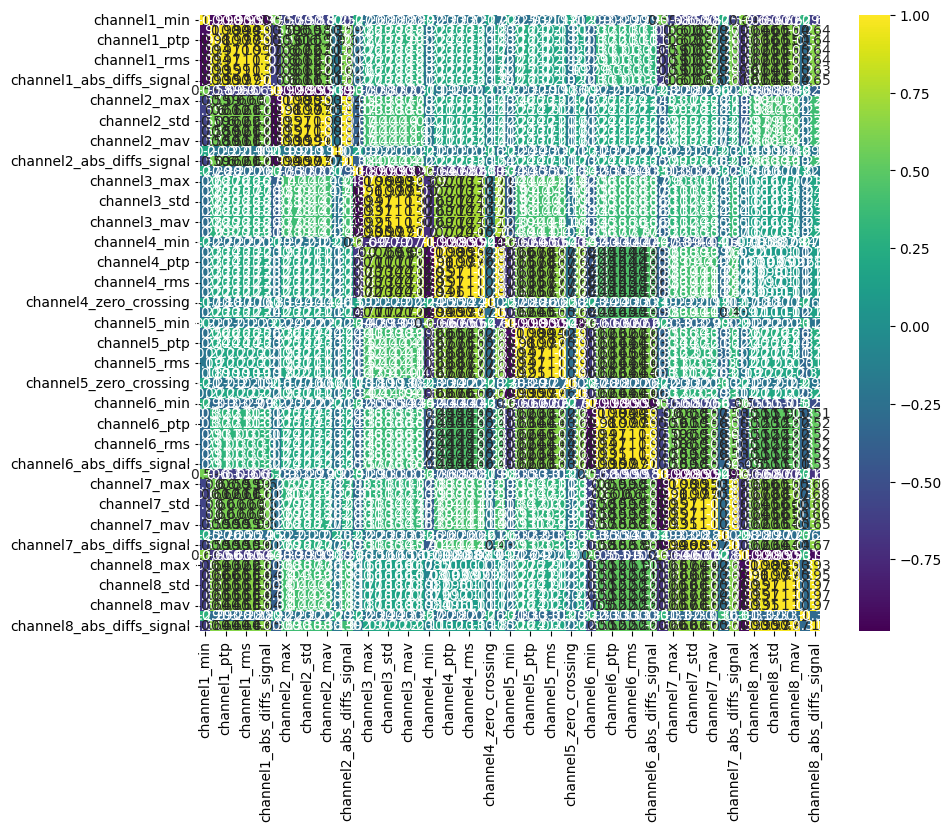

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix between features
corr = X_train_selected_df.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix with correlation values
sns.heatmap(corr, annot=True, cmap='viridis')

# Display the heatmap
plt.show()


In [ ]:
from time import time

## To store class performance of each model
clf_performance={'accuracy':[],'f1score':[],'training_time':[],'testing_time':[]}
training_time=[]
testing_time=[]

In [ ]:
clf_performance

{'accuracy': [], 'f1score': [], 'training_time': [], 'testing_time': []}

In [ ]:
## Function for prediction and confusion matrix

def pred_confu(model):
    print('Checking the accuracy in testing data:')
    testing_start=time()

    # Checking the accuracy in testing data
    y_test_predict = model.predict(X_test_selected)

    testing_end=time()
    f1_test = f1_score(y_test, y_test_predict, average = 'macro')
    confu_matrix = confusion_matrix(y_test, y_test_predict)




    # Create a list of class labels
    class_labels = np.unique(y_test)

    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    print("\n")
    sns.heatmap(confu_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()


    print(f"\nf1 test is : {f1_test}\n")
    # Calculate accuracy
    accuracy = metrics.accuracy_score(y_test, y_test_predict)

    # Calculate classification report
    classification_report = metrics.classification_report(y_test, y_test_predict)

    # Print the metrics
    print("\nAccuracy:", accuracy)
    print("\nClassification Report:\n", classification_report)


    clf_performance['accuracy'].append(accuracy)
    clf_performance['f1score'].append(f1_test)
    clf_performance['training_time'].append(training_end-training_start)
    clf_performance['testing_time'].append(testing_end-testing_start)


# Decision Tree Classifier

### 1.) Decision Tree Classifier by Gini Impurity


In [ ]:
training_start=time()
DTC = DecisionTreeClassifier(random_state = 42, criterion = 'gini')
# Fit the model
DTC.fit(X_train_selected, y_train)
training_end=time()

Checking the accuracy in testing data:




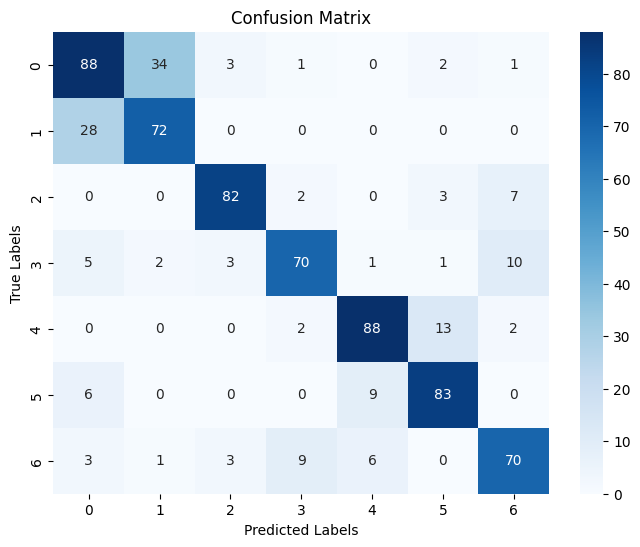


f1 test is : 0.7845441370253401


Accuracy: 0.7788732394366197

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.68      0.68       129
           1       0.66      0.72      0.69       100
           2       0.90      0.87      0.89        94
           3       0.83      0.76      0.80        92
           4       0.85      0.84      0.84       105
           5       0.81      0.85      0.83        98
           6       0.78      0.76      0.77        92

    accuracy                           0.78       710
   macro avg       0.79      0.78      0.78       710
weighted avg       0.78      0.78      0.78       710



In [ ]:
# predict values and confusion matrix performace

pred_confu(DTC)


### 2.) Decision Tree Classifier by Entropy

In [ ]:
training_start=time()

DTC = DecisionTreeClassifier(random_state = 42, criterion = 'entropy')
# Fit the model
DTC.fit(X_train_selected, y_train)
training_end=time()

Checking the accuracy in testing data:




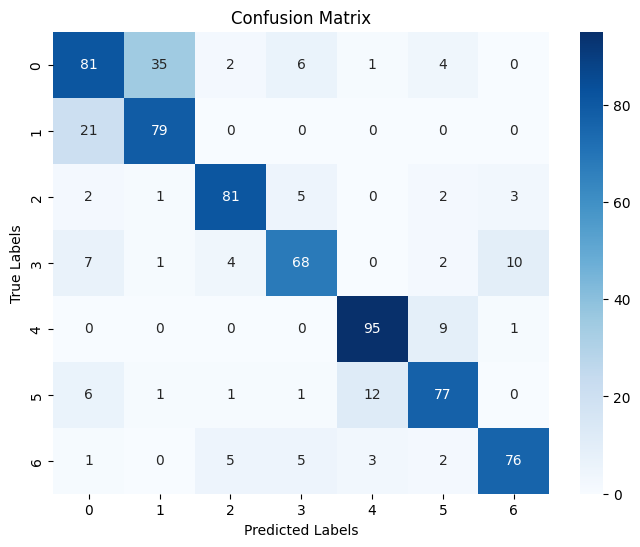


f1 test is : 0.7896088120793339


Accuracy: 0.7845070422535211

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.63      0.66       129
           1       0.68      0.79      0.73       100
           2       0.87      0.86      0.87        94
           3       0.80      0.74      0.77        92
           4       0.86      0.90      0.88       105
           5       0.80      0.79      0.79        98
           6       0.84      0.83      0.84        92

    accuracy                           0.78       710
   macro avg       0.79      0.79      0.79       710
weighted avg       0.79      0.78      0.78       710



In [ ]:

# predict values and confusion matrix performace

pred_confu(DTC)


# Random Forest Classifier

### 1.) Random Forest Classifier by Gini Impurity

In [ ]:
training_start=time()
rfc = RandomForestClassifier(n_estimators = 20, criterion= 'gini',random_state=42)
# fiiting model rfc
rfc.fit(X_train_selected,y_train)

training_end=time()

<ipython-input-547-4f6abe7e4149>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_selected,y_train)


Checking the accuracy in testing data:




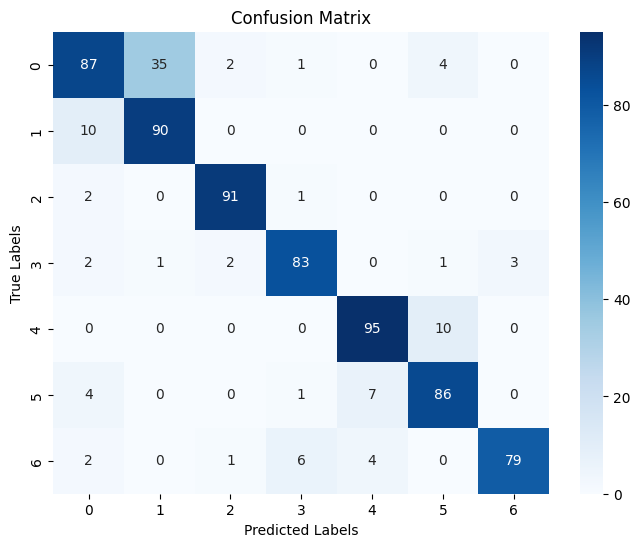


f1 test is : 0.8666654973101341


Accuracy: 0.8605633802816901

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.67      0.74       129
           1       0.71      0.90      0.80       100
           2       0.95      0.97      0.96        94
           3       0.90      0.90      0.90        92
           4       0.90      0.90      0.90       105
           5       0.85      0.88      0.86        98
           6       0.96      0.86      0.91        92

    accuracy                           0.86       710
   macro avg       0.87      0.87      0.87       710
weighted avg       0.87      0.86      0.86       710



In [ ]:
# predict values and confusion matrix performace

pred_confu(rfc)


### 2.) Random Forest Classifier by Entropy

In [ ]:
training_start=time()
rfc = RandomForestClassifier(n_estimators = 20, criterion= 'entropy',random_state=42)
# fiiting model rfc
rfc.fit(X_train_selected,y_train)
training_end=time()

<ipython-input-549-a17cf615a33c>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_selected,y_train)


Checking the accuracy in testing data:




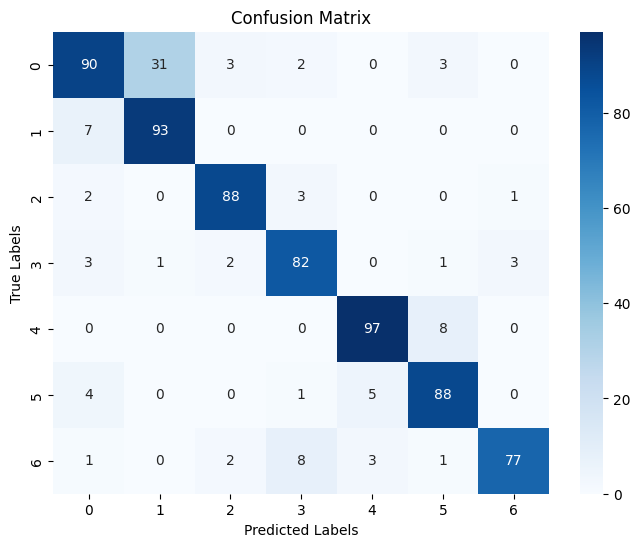


f1 test is : 0.8701915617984578


Accuracy: 0.8661971830985915

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.70      0.76       129
           1       0.74      0.93      0.83       100
           2       0.93      0.94      0.93        94
           3       0.85      0.89      0.87        92
           4       0.92      0.92      0.92       105
           5       0.87      0.90      0.88        98
           6       0.95      0.84      0.89        92

    accuracy                           0.87       710
   macro avg       0.87      0.87      0.87       710
weighted avg       0.87      0.87      0.87       710



In [ ]:
# predict values and confusion matrix performace

pred_confu(rfc)


# K Nearest neighbours

### 1. Training KNN Classifier by Manhattan distance [d = |(x2 - x1) + (y2 - y1)|]


In [ ]:
training_start=time()
knn=KNC(metric='manhattan',p = 1, algorithm= 'auto',n_neighbors=4,weights='distance',leaf_size=30)
# Fit the instance on the data and then predict the excepted value

knn = knn.fit(X_train_selected, y_train)
training_end=time()

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Checking the accuracy in testing data:




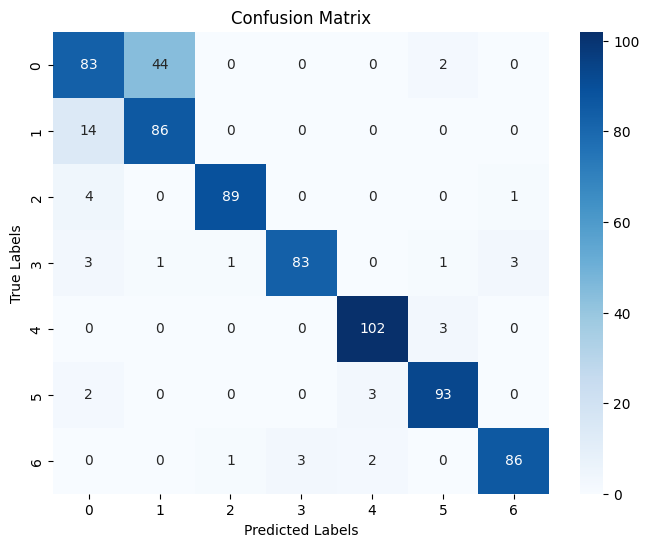


f1 test is : 0.8853142410976853


Accuracy: 0.8760563380281691

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.64      0.71       129
           1       0.66      0.86      0.74       100
           2       0.98      0.95      0.96        94
           3       0.97      0.90      0.93        92
           4       0.95      0.97      0.96       105
           5       0.94      0.95      0.94        98
           6       0.96      0.93      0.95        92

    accuracy                           0.88       710
   macro avg       0.89      0.89      0.89       710
weighted avg       0.88      0.88      0.88       710



In [ ]:
# predict values and confusion matrix performace

pred_confu(knn)

### 2. Training KNN Classifier by Euclidean distance [d = sqrt((x2 - x1)^2 + (y2 - y1)^2)]


In [ ]:
training_start=time()
knn=KNC(metric='euclidean',algorithm= 'auto',n_neighbors=4,p=2,weights='distance',leaf_size=30)
# Fit the instance on the data and then predict the excepted value

knn = knn.fit(X_train_selected, y_train)
training_end=time()

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Checking the accuracy in testing data:




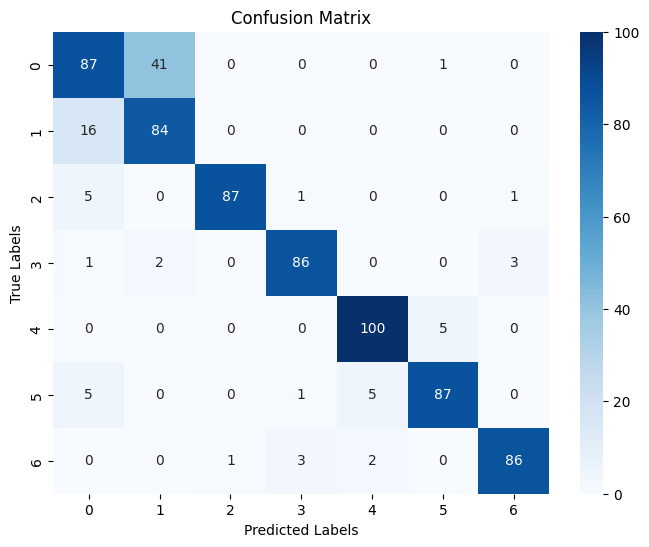


f1 test is : 0.8787882986767624


Accuracy: 0.8690140845070422

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.67      0.72       129
           1       0.66      0.84      0.74       100
           2       0.99      0.93      0.96        94
           3       0.95      0.93      0.94        92
           4       0.93      0.95      0.94       105
           5       0.94      0.89      0.91        98
           6       0.96      0.93      0.95        92

    accuracy                           0.87       710
   macro avg       0.88      0.88      0.88       710
weighted avg       0.88      0.87      0.87       710



In [ ]:
# predict values and confusion matrix performace

pred_confu(knn)

### 3. Training KNN Classifier (by minkowski distance [d = ((x2 - x1)^p + (y2 - y1)^p)^(1/p)])


In [ ]:
# Create an instance of the class
training_start=time()
knn=KNC(metric='minkowski',algorithm= 'auto',n_neighbors=4,weights='distance',leaf_size=30, p =3)
# Fit the instance on the data and then predict the excepted value

KNN = knn.fit(X_train_selected, y_train)
training_end=time()

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Checking the accuracy in testing data:




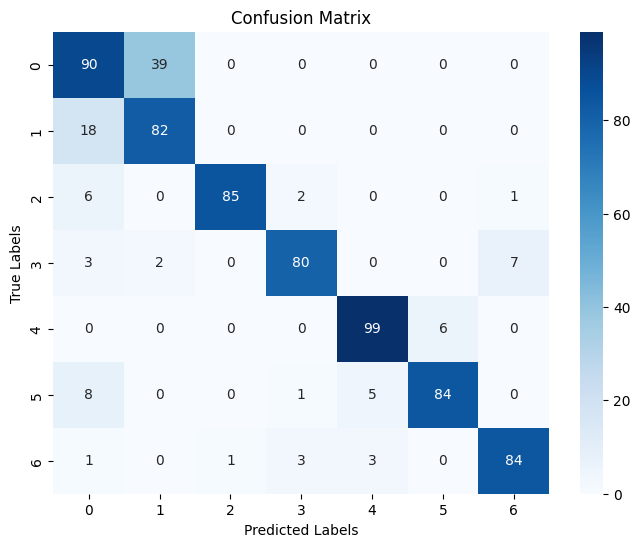


f1 test is : 0.8607502820767172


Accuracy: 0.8507042253521127

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.70      0.71       129
           1       0.67      0.82      0.74       100
           2       0.99      0.90      0.94        94
           3       0.93      0.87      0.90        92
           4       0.93      0.94      0.93       105
           5       0.93      0.86      0.89        98
           6       0.91      0.91      0.91        92

    accuracy                           0.85       710
   macro avg       0.87      0.86      0.86       710
weighted avg       0.86      0.85      0.85       710



In [ ]:
# predict values and confusion matrix performace

pred_confu(KNN)

# Ada-Boost Classifier

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.1,
                   n_estimators=10, random_state=42)
Checking the accuracy in testing data:




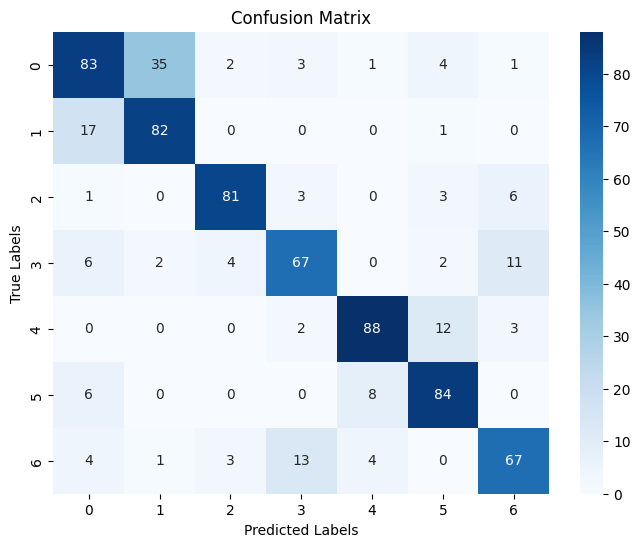


f1 test is : 0.7810676155318788


Accuracy: 0.7774647887323943

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.64      0.67       129
           1       0.68      0.82      0.75       100
           2       0.90      0.86      0.88        94
           3       0.76      0.73      0.74        92
           4       0.87      0.84      0.85       105
           5       0.79      0.86      0.82        98
           6       0.76      0.73      0.74        92

    accuracy                           0.78       710
   macro avg       0.78      0.78      0.78       710
weighted avg       0.78      0.78      0.78       710



In [ ]:
training_start=time()
# Create an instance of the class
SEABC = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(),learning_rate = 0.1, n_estimators = 10
,random_state=42)

# Fit the instance on the data and then predict the expected value
ABC = SEABC.fit(X_train_selected, y_train)
training_end=time()
print(ABC)
# predict values and confusion matrix performace

pred_confu(ABC)

# Gradient Boosting Classifier

In [ ]:
# Create Instance of the class
training_start=time()
segbc = GradientBoostingClassifier(learning_rate= 0.1, max_features= 8, subsample = 0.8, n_estimators= 80,random_state=42)

# Fit the instance on the data and then predict the expected value
gbc = segbc.fit(X_train_selected, y_train)
training_end=time()


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Checking the accuracy in testing data:




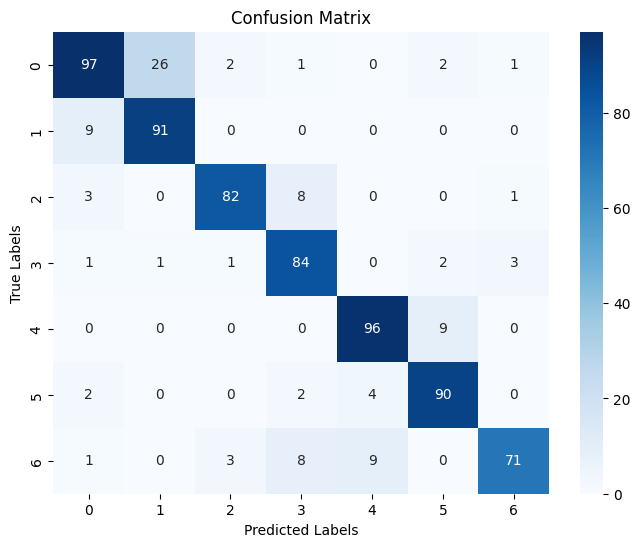


f1 test is : 0.8624441979286408


Accuracy: 0.8605633802816901

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80       129
           1       0.77      0.91      0.83       100
           2       0.93      0.87      0.90        94
           3       0.82      0.91      0.86        92
           4       0.88      0.91      0.90       105
           5       0.87      0.92      0.90        98
           6       0.93      0.77      0.85        92

    accuracy                           0.86       710
   macro avg       0.87      0.86      0.86       710
weighted avg       0.87      0.86      0.86       710



In [ ]:
# predict values and confusion matrix performace

pred_confu(gbc)

# XG Boost Classifier

In [ ]:
from sklearn.preprocessing import LabelEncoder


[12:46:02] WARNING: ../src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[0]	Test-aucpr:nan
[12:46:02] WARNING: ../src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[1]	Test-aucpr:nan


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12:46:02] WARNING: ../src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[2]	Test-aucpr:nan
[12:46:02] WARNING: ../src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[3]	Test-aucpr:nan
[12:46:02] WARNING: ../src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[4]	Test-aucpr:nan
[12:46:02] WARNING: ../src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[5]	Test-aucpr:nan
[12:46:02] WARNING: ../src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[6]	Test-aucpr:nan
[12:46:02] WARNING: ../src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[7]	Test-aucpr:nan
[12:46:02] WARNING: ../src/metric/auc.cc:328: Dataset is empty, or contains only positive or negative samples.
[8]	Test-aucpr:nan
[12:46:02] WARNING: ../src/metric/auc.cc:328: Dataset is empty, or contains only positive 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


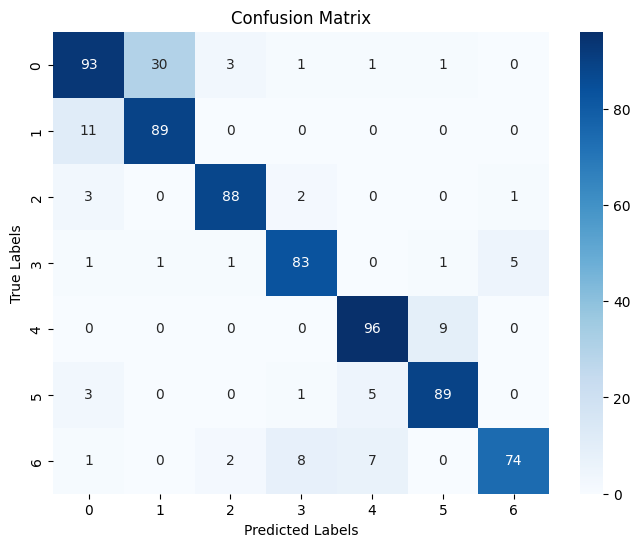


f1 test for XGBoost is : 0.8659138808475116


Accuracy for XGBoost : 0.8619718309859155
Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.83      0.72      0.77       129
           1       0.74      0.89      0.81       100
           2       0.94      0.94      0.94        94
           3       0.87      0.90      0.89        92
           4       0.88      0.91      0.90       105
           5       0.89      0.91      0.90        98
           6       0.93      0.80      0.86        92

    accuracy                           0.86       710
   macro avg       0.87      0.87      0.87       710
weighted avg       0.87      0.86      0.86       710



In [ ]:


# Convert data to DMatrix format
training_start = time()
dtrain = xgb.DMatrix(X_train_selected, label=LabelEncoder().fit_transform(y_train))
dtest = xgb.DMatrix(X_test_selected, label=LabelEncoder().fit_transform(y_test))

# Set XGBoost parameters
params = {
    'objective': 'multi:softmax',
    'eval_metric': 'aucpr',
    'num_class': 36,
    'eta': 0.1,
    'max_depth': 10,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'tree_method': 'hist',
    'verbosity': 1,
    'random_state': 42
}

# Train the XGBoost classifier
xgb_classifier = xgb.train(params, dtrain, num_boost_round=100, early_stopping_rounds=20,
                           evals=[(dtest, "Test")], verbose_eval=True)
training_end = time()

# Make predictions using XGBoost
testing_start = time()
y_pred_xgb = xgb_classifier.predict(dtest)
testing_end = time()

# Calculate XGBoost accuracy
accuracy_xgb = accuracy_score(LabelEncoder().fit_transform(y_test), y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)

# Calculate F1 score for XGBoost
f1_test_xgb = f1_score(y_test, LabelEncoder().fit_transform(y_pred_xgb), average='macro')

# Create a list of class labels
class_labels = np.unique(y_test)

# Plotting the confusion matrix
confu_matrix = confusion_matrix(LabelEncoder().fit_transform(y_test), y_pred_xgb)

plt.figure(figsize=(8, 6))
print("\n")
sns.heatmap(confu_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print(f"\nf1 test for XGBoost is : {f1_test_xgb}\n")


# Print the metrics
print("\nAccuracy for XGBoost :", accuracy_xgb)

# Calculate classification report for XGBoost
classification_report_xgb = metrics.classification_report(y_test, LabelEncoder().fit_transform(y_pred_xgb))
print("Classification Report for XGBoost:\n", classification_report_xgb)

# Append performance metrics to clf_performance
clf_performance['accuracy'].append(accuracy_xgb)
clf_performance['f1score'].append(f1_test_xgb)
clf_performance['training_time'].append(training_end - training_start)
clf_performance['testing_time'].append(testing_end - testing_start)


# Support Vector Machine

### 1. Support Vector Classifier by using linear kernel

In [ ]:
training_start=time()
svc=SVC(C=1,kernel='linear',gamma=0.01,decision_function_shape='ovr', random_state=42)
svc.fit(X_train_selected,y_train)
training_end=time()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Checking the accuracy in testing data:




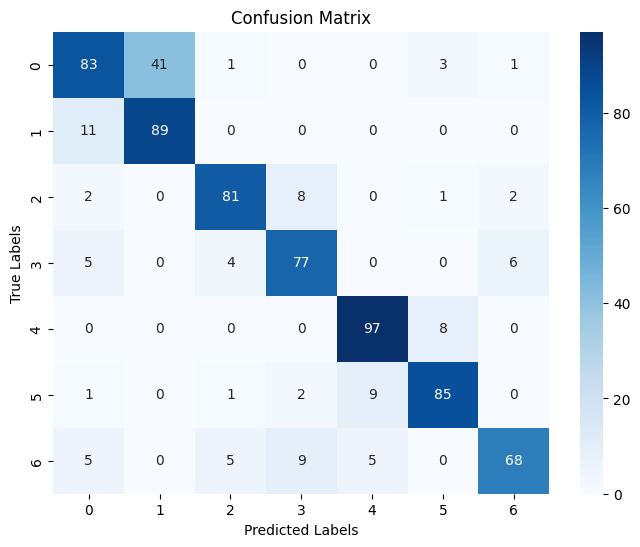


f1 test is : 0.820299471406586


Accuracy: 0.8169014084507042

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.64      0.70       129
           1       0.68      0.89      0.77       100
           2       0.88      0.86      0.87        94
           3       0.80      0.84      0.82        92
           4       0.87      0.92      0.90       105
           5       0.88      0.87      0.87        98
           6       0.88      0.74      0.80        92

    accuracy                           0.82       710
   macro avg       0.83      0.82      0.82       710
weighted avg       0.82      0.82      0.82       710



In [ ]:
# predict values and confusion matrix performace

pred_confu(svc)

### 2. Support Vector classifier by using Poly kernel

In [ ]:
training_start=time()

svc=SVC(C=120,kernel='poly',gamma=0.01,decision_function_shape='ovr', random_state=42)
svc.fit(X_train_selected,y_train)
training_end=time()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Checking the accuracy in testing data:




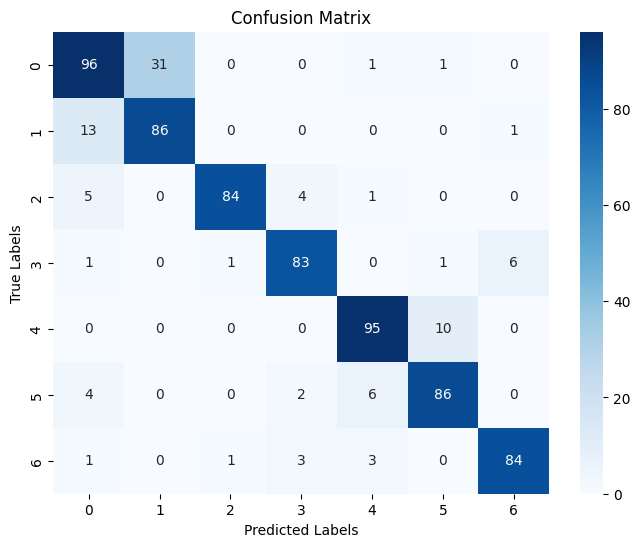


f1 test is : 0.8707537218256437


Accuracy: 0.8647887323943662

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       129
           1       0.74      0.86      0.79       100
           2       0.98      0.89      0.93        94
           3       0.90      0.90      0.90        92
           4       0.90      0.90      0.90       105
           5       0.88      0.88      0.88        98
           6       0.92      0.91      0.92        92

    accuracy                           0.86       710
   macro avg       0.87      0.87      0.87       710
weighted avg       0.87      0.86      0.87       710



In [ ]:
# predict values and confusion matrix performace

pred_confu(svc)

### 3. Support Vector Classifier by using RBF kernel

In [ ]:
training_start=time()
svc=SVC(C=120,kernel='rbf',gamma=0.01,decision_function_shape='ovr', random_state=42)
svc.fit(X_train_selected,y_train)
training_end=time()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Checking the accuracy in testing data:




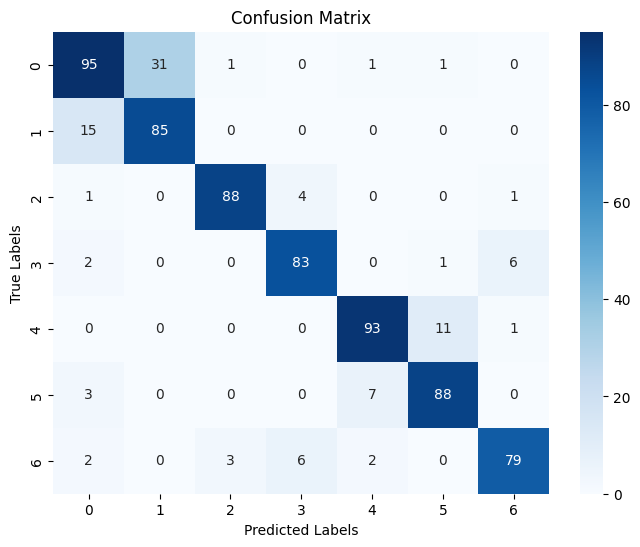


f1 test is : 0.8658765866763188


Accuracy: 0.8605633802816901

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.74      0.77       129
           1       0.73      0.85      0.79       100
           2       0.96      0.94      0.95        94
           3       0.89      0.90      0.90        92
           4       0.90      0.89      0.89       105
           5       0.87      0.90      0.88        98
           6       0.91      0.86      0.88        92

    accuracy                           0.86       710
   macro avg       0.87      0.87      0.87       710
weighted avg       0.86      0.86      0.86       710



In [ ]:
# predict values and confusion matrix performace

pred_confu(svc)

# Naive Bayes

###1. Naive Bayes by GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

training_start=time()
# Create a Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Train the classifier on the training data
classifier.fit(X_train_selected, y_train)
training_end=time()



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Checking the accuracy in testing data:




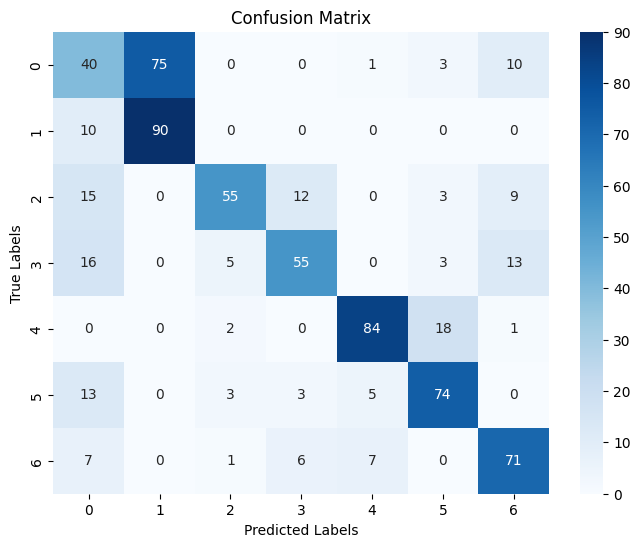


f1 test is : 0.6670321188481882


Accuracy: 0.6605633802816901

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.31      0.35       129
           1       0.55      0.90      0.68       100
           2       0.83      0.59      0.69        94
           3       0.72      0.60      0.65        92
           4       0.87      0.80      0.83       105
           5       0.73      0.76      0.74        98
           6       0.68      0.77      0.72        92

    accuracy                           0.66       710
   macro avg       0.68      0.67      0.67       710
weighted avg       0.67      0.66      0.65       710



In [ ]:
# predict values and confusion matrix performace

pred_confu(classifier)

### 2. Multinomial Naive Bayes Classifier

In [ ]:
# Assuming X_train_selected is a NumPy array
negative_columns = np.all((X_train_selected >= 0) & (X_train_selected <=1), axis=0)

# Get the column names with negative values
columns_with_negative = X_train_selected_df.columns[negative_columns]

if columns_with_negative.size == 0:
    print("No columns have positive values.")
else:
    print("Columns with positive values:", len(columns_with_negative))

No columns have positive values.


In [ ]:
# Change the data in Min Max Scaler
from sklearn.preprocessing import MinMaxScaler

# Splitting the data into training and testing sets
X_train_mms, X_test_mms, y_train_mms, y_test_mms = train_test_split(feature_columns, class_column, test_size=0.2, random_state=42)

# Apply Min-Max Scaling to the feature data
scaler = MinMaxScaler()
X_train_mms = scaler.fit_transform(X_train_mms)
X_test_mms = scaler.transform(X_test_mms)

# Convert the scaled arrays back to DataFrames
X_train_mms_df = pd.DataFrame(X_train_mms, columns=feature_columns.columns)
X_test_mms_df = pd.DataFrame(X_test_mms, columns=feature_columns.columns)

In [ ]:
# Assuming X_train_selected is a NumPy array
positive_columns = np.all((X_train_mms >= 0) & (X_train_mms <=1), axis=0)

# Get the column names with negative values
columns_with_positive = X_train_mms_df.columns[positive_columns]

if columns_with_positive.size == 0:
    print("No columns have positive values.")
else:
    print("Columns with positive values:", columns_with_positive)

Columns with positive values: Index(['channel1_min', 'channel1_max', 'channel1_ptp', 'channel1_std',
       'channel1_rms', 'channel1_mav', 'channel1_zero_crossing',
       'channel2_min', 'channel2_max', 'channel2_std', 'channel2_rms',
       'channel2_mav', 'channel2_zero_crossing', 'channel2_abs_diffs_signal',
       'channel3_min', 'channel3_max', 'channel3_std', 'channel3_mav',
       'channel3_zero_crossing', 'channel3_abs_diffs_signal', 'channel4_min',
       'channel4_max', 'channel4_ptp', 'channel4_std', 'channel4_mav',
       'channel4_zero_crossing', 'channel4_abs_diffs_signal', 'channel5_min',
       'channel5_max', 'channel5_ptp', 'channel5_std', 'channel5_rms',
       'channel5_mav', 'channel5_zero_crossing', 'channel5_abs_diffs_signal',
       'channel6_min', 'channel6_max', 'channel6_ptp', 'channel6_std',
       'channel6_rms', 'channel6_mav', 'channel6_zero_crossing',
       'channel6_abs_diffs_signal', 'channel7_min', 'channel7_max',
       'channel7_ptp', 'channel7_s

In [ ]:
# Select positive columns from the DataFrame
X_train_positive = X_train_mms_df.loc[:, positive_columns]
X_test_positive = X_test_mms_df.loc[:, positive_columns]

In [ ]:
# Create and train a Multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

training_start=time()
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_positive, y_train_mms)
training_end=time()

Checking the accuracy in testing data:




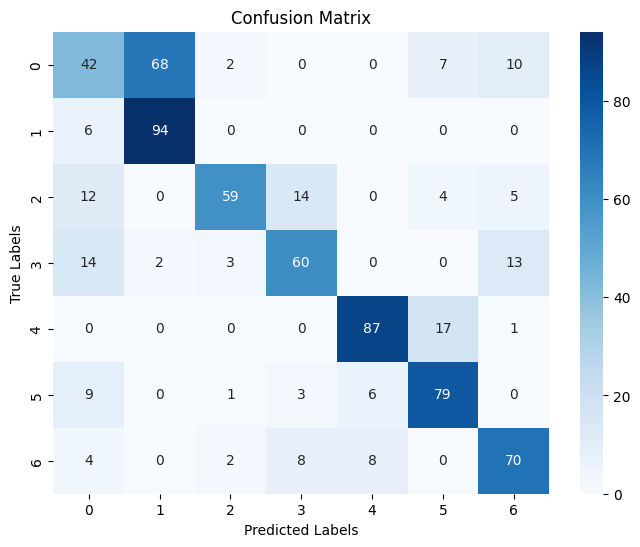


f1 test is : 0.6943245217212785


Accuracy: 0.6915492957746479

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.33      0.39       129
           1       0.57      0.94      0.71       100
           2       0.88      0.63      0.73        94
           3       0.71      0.65      0.68        92
           4       0.86      0.83      0.84       105
           5       0.74      0.81      0.77        98
           6       0.71      0.76      0.73        92

    accuracy                           0.69       710
   macro avg       0.71      0.71      0.69       710
weighted avg       0.70      0.69      0.68       710



In [ ]:
# Checking the accuracy in testing data
print('Checking the accuracy in testing data:')
testing_start=time()
y_test_predict = nb_classifier.predict(X_test_positive)
testing_end=time()

f1_test = f1_score(y_test_mms, y_test_predict, average = 'macro')
confu_matrix = confusion_matrix(y_test_mms, y_test_predict)

# Create a list of class labels
class_labels = np.unique(y_test_mms)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
print("\n")
sns.heatmap(confu_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print(f"\nf1 test is : {f1_test}\n")
# Calculate accuracy
accuracy = metrics.accuracy_score(y_test_mms, y_test_predict)

# Calculate classification report
classification_report = metrics.classification_report(y_test_mms, y_test_predict)

# Print the metrics

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_report)

# Append performance metrics to clf_performance
clf_performance['accuracy'].append(accuracy)
clf_performance['f1score'].append(f1_test)
clf_performance['training_time'].append(training_end-training_start)
clf_performance['testing_time'].append(testing_end-testing_start)

# Linear Discriminant Analysis

###  LDA with Linear SVM

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier

In [ ]:
X_train_selected.shape, y_train.shape

((2839, 61), (2839, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


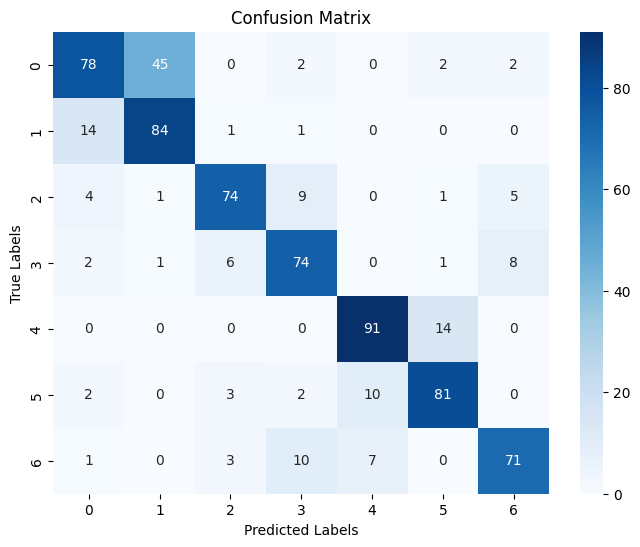


f1 test is : 0.7823869216480336

Accuracy: 0.7788732394366197
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.60      0.68       129
           1       0.64      0.84      0.73       100
           2       0.85      0.79      0.82        94
           3       0.76      0.80      0.78        92
           4       0.84      0.87      0.85       105
           5       0.82      0.83      0.82        98
           6       0.83      0.77      0.80        92

    accuracy                           0.78       710
   macro avg       0.79      0.79      0.78       710
weighted avg       0.79      0.78      0.78       710



In [ ]:
# Perform Linear Discriminant Analysis (LDA)
training_start = time()
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train_selected, y_train)

# Train a Linear Support Vector Machine (SVM) classifier on the LDA-transformed training data
svm_classifier = SVC(kernel='linear', C=11.0, random_state=42)
svm_classifier.fit(X_train_lda, y_train)
training_end = time()


# Transform the test data using the same LDA transformation
testing_start=time()
X_test_lda = lda.transform(X_test_selected)

# Make predictions on the LDA-transformed test data
y_test_predict = svm_classifier.predict(X_test_lda)
testing_end = time()

# Evaluate the model's performance
f1_test = f1_score(y_test, y_test_predict, average='macro')
accuracy = accuracy_score(y_test, y_test_predict)

# Print confusion matrix
confu_matrix = confusion_matrix(y_test, y_test_predict)
class_labels = np.unique(y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(confu_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Calculate classification report
classification_report = metrics.classification_report(y_test, y_test_predict)


# Print metrics
print(f"\nf1 test is : {f1_test}\n")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report)

# Append performance metrics to clf_performance
clf_performance['accuracy'].append(accuracy)
clf_performance['f1score'].append(f1_test)
clf_performance['training_time'].append(training_end-training_start)
clf_performance['testing_time'].append(testing_end-testing_start)

# Logistic Regression (Multiclass):

In [ ]:
from sklearn.linear_model import LogisticRegression

training_start=time()
clf = LogisticRegression(max_iter=100, multi_class='multinomial', solver='lbfgs',C=0.7, penalty='l2', random_state=42)
# Fit the classifier to the training data
clf.fit(X_train_selected, y_train)
training_end=time()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Checking the accuracy in testing data:




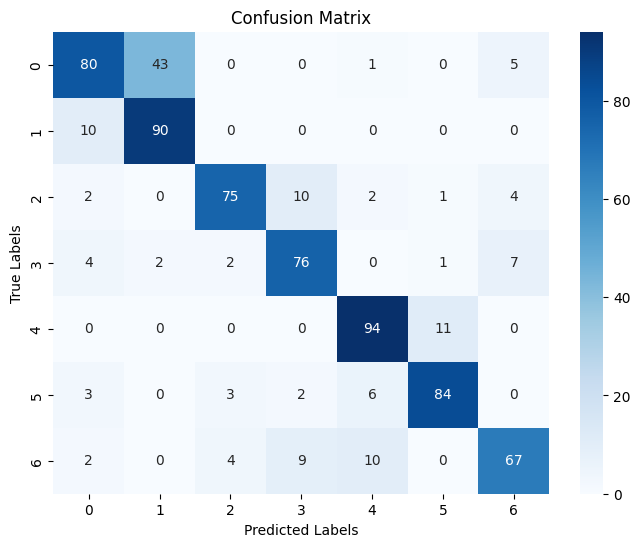


f1 test is : 0.7997395889316438


Accuracy: 0.7971830985915493

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.62      0.70       129
           1       0.67      0.90      0.77       100
           2       0.89      0.80      0.84        94
           3       0.78      0.83      0.80        92
           4       0.83      0.90      0.86       105
           5       0.87      0.86      0.86        98
           6       0.81      0.73      0.77        92

    accuracy                           0.80       710
   macro avg       0.81      0.80      0.80       710
weighted avg       0.80      0.80      0.80       710



In [ ]:
# predict values and confusion matrix performace

pred_confu(clf)

In [ ]:
clf_performance

{'accuracy': [0.7788732394366197,
  0.7845070422535211,
  0.8605633802816901,
  0.8661971830985915,
  0.8760563380281691,
  0.8690140845070422,
  0.8507042253521127,
  0.7774647887323943,
  0.8605633802816901,
  0.8619718309859155,
  0.8169014084507042,
  0.8647887323943662,
  0.8605633802816901,
  0.6605633802816901,
  0.6915492957746479,
  0.7788732394366197,
  0.7971830985915493],
 'f1score': [0.7845441370253401,
  0.7896088120793339,
  0.8666654973101341,
  0.8701915617984578,
  0.8853142410976853,
  0.8787882986767624,
  0.8607502820767172,
  0.7810676155318788,
  0.8624441979286408,
  0.8659138808475116,
  0.820299471406586,
  0.8707537218256437,
  0.8658765866763188,
  0.6670321188481882,
  0.6943245217212785,
  0.7823869216480336,
  0.7997395889316438],
 'training_time': [0.23598432540893555,
  0.22266316413879395,
  0.2984638214111328,
  0.4225780963897705,
  0.004740238189697266,
  0.008539915084838867,
  0.005314350128173828,
  0.28967785835266113,
  4.333367824554443,
  1.7

In [ ]:
## stack them vertically
accu = np.array(clf_performance['accuracy'])
f1 = np.array(clf_performance['f1score'])

In [ ]:
table=pd.DataFrame(np.stack((accu,f1)),columns=['DT Gini','DT Entropy','RF Gini','RF Entropy','KNN Manhattan','KNN Euclidian','KNN Minkowski(p=3)','Ada Boost','Grad Boosting','XG Boost','SVM-liner','SVM-poly','SVM-RBF','GaussianNB','MultinomialNB','LDA-SVM','LR'],
            index=['Accuracy','F1-score'])

In [ ]:
table

,DT Gini,DT Entropy,RF Gini,RF Entropy,KNN Manhattan,KNN Euclidian,KNN Minkowski(p=3),Ada Boost,Grad Boosting,XG Boost,SVM-liner,SVM-poly,SVM-RBF,GaussianNB,MultinomialNB,LDA-SVM,LR
Accuracy,0.778873,0.784507,0.860563,0.866197,0.876056,0.869014,0.850704,0.777465,0.860563,0.861972,0.816901,0.864789,0.860563,0.660563,0.691549,0.778873,0.797183
F1-score,0.784544,0.789609,0.866665,0.870192,0.885314,0.878788,0.860750,0.781068,0.862444,0.865914,0.820299,0.870754,0.865877,0.667032,0.694325,0.782387,0.799740


In [ ]:
table.columns

Index(['DT Gini', 'DT Entropy', 'RF Gini', 'RF Entropy', 'KNN Manhattan',
       'KNN Euclidian', 'KNN Minkowski(p=3)', 'Ada Boost', 'Grad Boosting',
       'XG Boost', 'SVM-liner', 'SVM-poly', 'SVM-RBF', 'GaussianNB',
       'MultinomialNB', 'LDA-SVM', 'LR'],
      dtype='object')

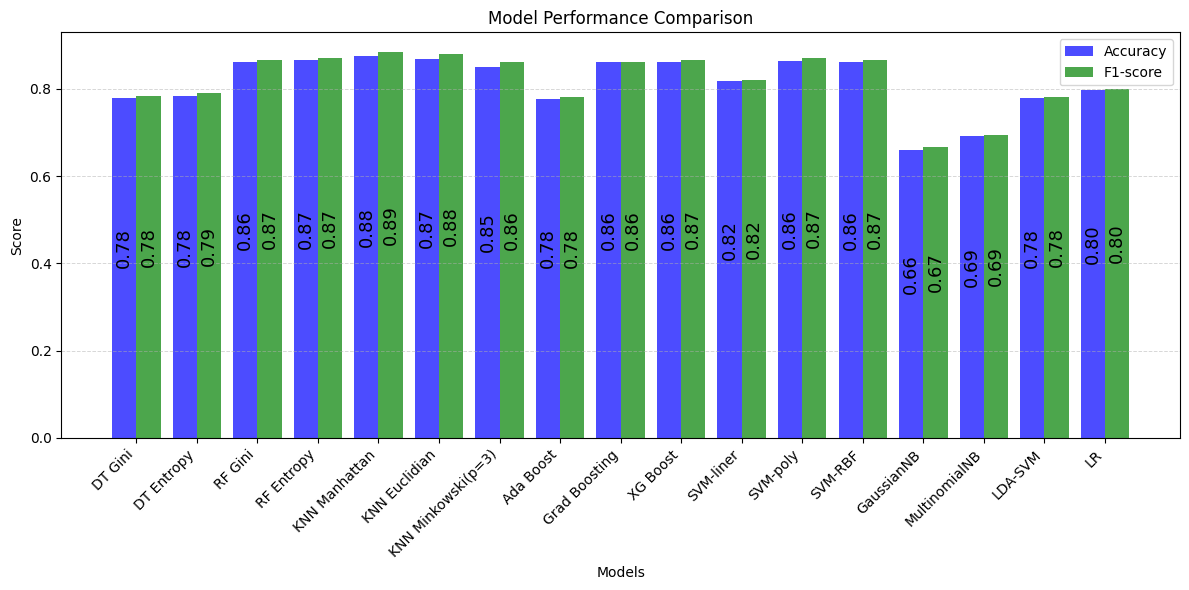

In [ ]:
# Create a bar plot
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(table.columns))
bar_width = 0.4

rects1 = ax.bar(x - bar_width/2, table.loc['Accuracy'], bar_width, label='Accuracy', color='b', alpha=0.7)
rects2 = ax.bar(x + bar_width/2, table.loc['F1-score'], bar_width, label='F1-score', color='g', alpha=0.7)

ax.set_title('Model Performance Comparison')
ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_xticklabels(table.columns, rotation=45, ha="right")
ax.legend()

# Show two decimal places inside the middle of each bar and rotate by 90 degrees
for rect1, rect2 in zip(rects1, rects2):
    height1 = rect1.get_height()
    height2 = rect2.get_height()
    ax.annotate(f'{height1:.2f}', xy=(rect1.get_x() + rect1.get_width() / 2, height1/2),
                xytext=(0, 0), textcoords='offset points', ha='center', va='bottom', rotation='vertical',fontsize=13)
    ax.annotate(f'{height2:.2f}', xy=(rect2.get_x() + rect2.get_width() / 2, height2/2),
                xytext=(0, 0), textcoords='offset points', ha='center', va='bottom', rotation='vertical',fontsize=13)

# Add square grid
ax.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.5)

plt.tight_layout()
plt.show()




In [ ]:
import pandas as pd

time_df = pd.DataFrame(zip(np.array(clf_performance['training_time']), np.array(clf_performance['testing_time'])),
                       columns=['training_time', 'testing_time'],
                       index=table.columns)

print(time_df)


                    training_time  testing_time
DT Gini                  0.235984      0.000682
DT Entropy               0.222663      0.000934
RF Gini                  0.298464      0.004606
RF Entropy               0.422578      0.007778
KNN Manhattan            0.004740      0.160564
KNN Euclidian            0.008540      0.021885
KNN Minkowski(p=3)       0.005314      3.387322
Ada Boost                0.289678      0.001094
Grad Boosting            4.333368      0.011428
XG Boost                 1.700434      0.004553
SVM-liner                0.237355      0.055094
SVM-poly                 0.182794      0.051280
SVM-RBF                  0.200086      0.073530
GaussianNB               0.008200      0.002889
MultinomialNB            0.007569      0.003109
LDA-SVM                  0.394557      0.029972
LR                       0.263204      0.003309


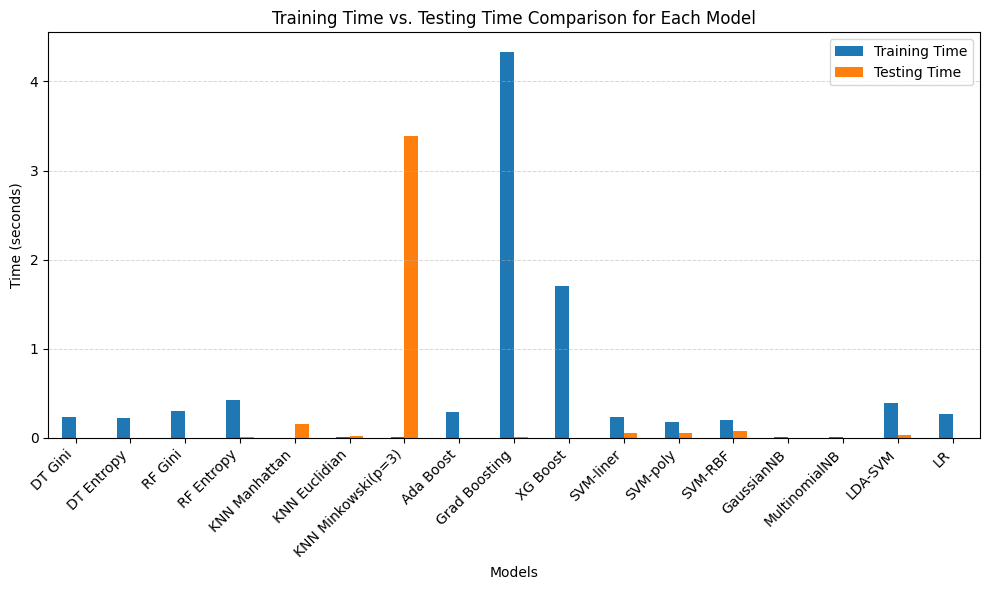

In [ ]:
# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
time_df.plot(kind='bar', ax=ax)
ax.set_title('Training Time vs. Testing Time Comparison for Each Model')
ax.set_xlabel('Models')
ax.set_ylabel('Time (seconds)')
ax.set_xticklabels(time_df.index, rotation=45, ha="right")
ax.legend(["Training Time", "Testing Time"])
ax.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.5)
plt.tight_layout()

plt.show()

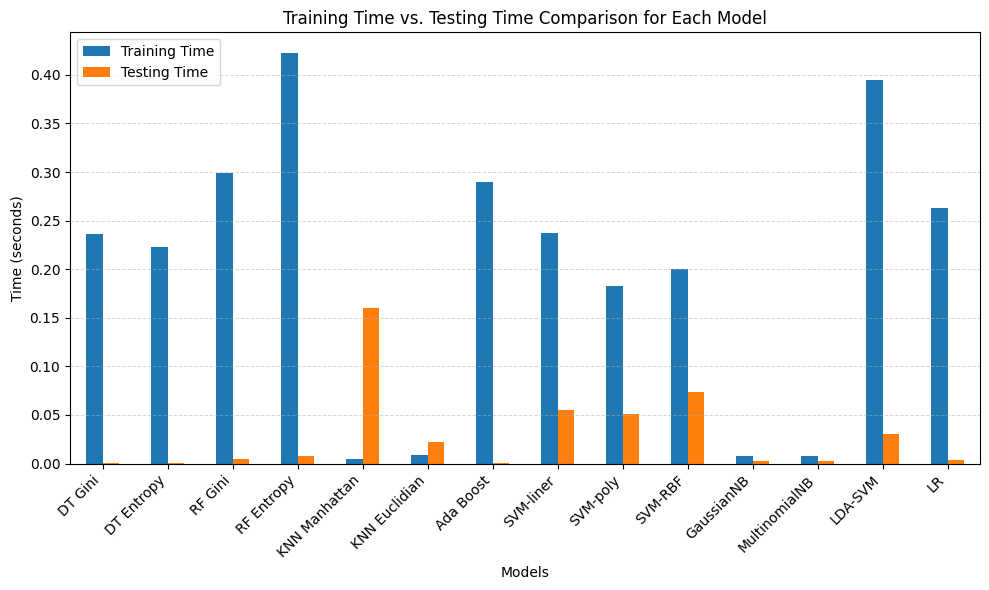

In [ ]:
# Filter models with training and testing times less than or equal to 1 second
time_df_filtered = time_df[(time_df['training_time'] <= 1) & (time_df['testing_time'] <= 1)]

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
time_df_filtered.plot(kind='bar', ax=ax)
ax.set_title('Training Time vs. Testing Time Comparison for Each Model')
ax.set_xlabel('Models')
ax.set_ylabel('Time (seconds)')
ax.set_xticklabels(time_df_filtered.index, rotation=45, ha="right")
ax.legend(["Training Time", "Testing Time"])
ax.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.5)
plt.tight_layout()

plt.show()
